In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data

In [2]:
df=pd.read_csv("relationship_advise_comments_20.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 6315


# General EDA

In [3]:
df.head()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday
0,[],NaN,boop_the_snoot30167,NaN,NaN,NaN,[],NaN,NaN,NaN,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
1,[],NaN,GunsmokeG,1.499216e+09,NaN,NaN,[],NaN,NaN,NaN,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
2,[],NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,dark,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
3,[],NaN,mwayneb,NaN,NaN,NaN,[],NaN,NaN,NaN,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
4,[],NaN,MarBremus,NaN,NaN,NaN,[],NaN,NaN,NaN,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN


In [4]:
df.tail()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday
522861,[],NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,dark,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522862,[],NaN,combatativemonkey,NaN,NaN,NaN,[],NaN,NaN,NaN,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522863,[],NaN,Cuddlyflower,1.508142e+09,NaN,NaN,[],8a7a43ce-57d9-11e8-9fb9-0e384ac6db5e,Teens Female,dark,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522864,[],NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,dark,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522865,[],NaN,chillingrilling,NaN,NaN,NaN,[],NaN,NaN,NaN,...,True,False,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN


In [5]:
df.info()  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 522866 entries, 0 to 522865
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    522866 non-null  object 
 1   associated_award                 0 non-null       float64
 2   author                           522866 non-null  object 
 3   author_created_utc               132408 non-null  float64
 4   author_flair_background_color    0 non-null       float64
 5   author_flair_css_class           3 non-null       object 
 6   author_flair_richtext            455788 non-null  object 
 7   author_flair_template_id         15320 non-null   object 
 8   author_flair_text                15523 non-null   object 
 9   author_flair_text_color          82601 non-null   object 
 10  author_flair_type                455788 non-null  object 
 11  author_fullname                  455788 non-null  object 
 12  au

In [6]:
df.isnull().sum() 

all_awardings                           0
associated_award                   522866
author                                  0
author_created_utc                 390458
author_flair_background_color      522866
author_flair_css_class             522863
author_flair_richtext               67078
author_flair_template_id           507546
author_flair_text                  507343
author_flair_text_color            440265
author_flair_type                   67078
author_fullname                     67078
author_patreon_flair                67078
author_premium                      67078
awarders                                0
body                                    1
can_gild                                0
can_mod_post                            0
collapsed                               0
collapsed_because_crowd_control    522866
collapsed_reason                   510040
comment_type                       522866
controversiality                        0
created_utc                       

In [7]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,collapsed_because_crowd_control,comment_type,controversiality,created_utc,gilded,removal_reason,retrieved_on,score,top_awarded_type,total_awards_received
count,0.0,1.324080e+05,0.0,0.0,0.0,522866.000000,5.228660e+05,522866.000000,0.0,5.228660e+05,522866.000000,0.0,522866.000000
mean,NaN,1.470490e+09,NaN,NaN,NaN,0.025200,1.605513e+09,0.000270,NaN,1.616978e+09,10.085988,NaN,0.006252
std,NaN,7.681885e+07,NaN,NaN,NaN,0.156731,8.364526e+05,0.017762,NaN,6.845185e+05,83.014134,NaN,0.175294
min,NaN,1.127102e+09,NaN,NaN,NaN,0.000000,1.604189e+09,0.000000,NaN,1.615910e+09,-1314.000000,NaN,0.000000
25%,NaN,1.426687e+09,NaN,NaN,NaN,0.000000,1.604691e+09,0.000000,NaN,1.616298e+09,1.000000,NaN,0.000000
50%,NaN,1.498560e+09,NaN,NaN,NaN,0.000000,1.605746e+09,0.000000,NaN,1.617162e+09,2.000000,NaN,0.000000
75%,NaN,1.532876e+09,NaN,NaN,NaN,0.000000,1.606259e+09,0.000000,NaN,1.617596e+09,3.000000,NaN,0.000000
max,NaN,1.554130e+09,NaN,NaN,NaN,1.000000,1.606781e+09,3.000000,NaN,1.618029e+09,6790.000000,NaN,34.000000


In [8]:
df.columns

Index(['all_awardings', 'associated_award', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'can_gild', 'can_mod_post', 'collapsed',
       'collapsed_because_crowd_control', 'collapsed_reason', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'quarantined', 'removal_reason',
       'retrieved_on', 'score', 'send_replies', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_name_prefixed', 'subreddit_type',
       'top_awarded_type', 'total_awards_received', 'treatment_tags',
       'author_cakeday'],
      dtype='object')

# One Feature EDA

# Controversialty

0    509690
1     13176
Name: controversiality, dtype: int64


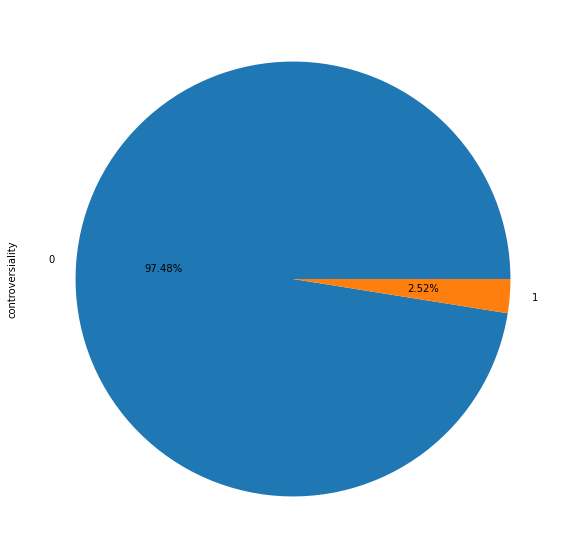

In [9]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [10]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [11]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    509690
1     13176
Name: controversiality, dtype: int64


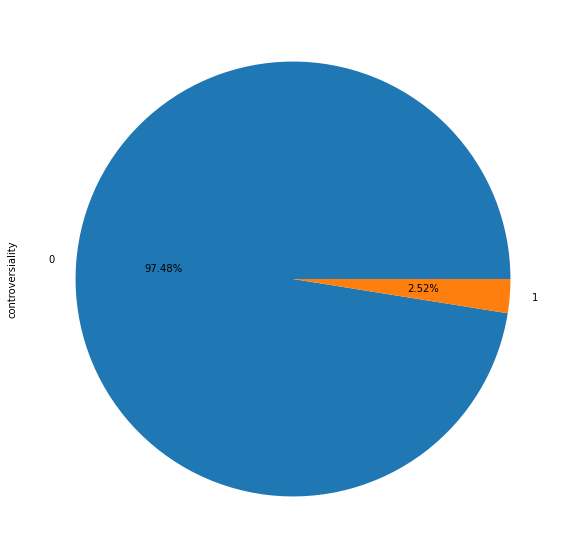

In [12]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

False    518915
True       3951
Name: stickied, dtype: int64


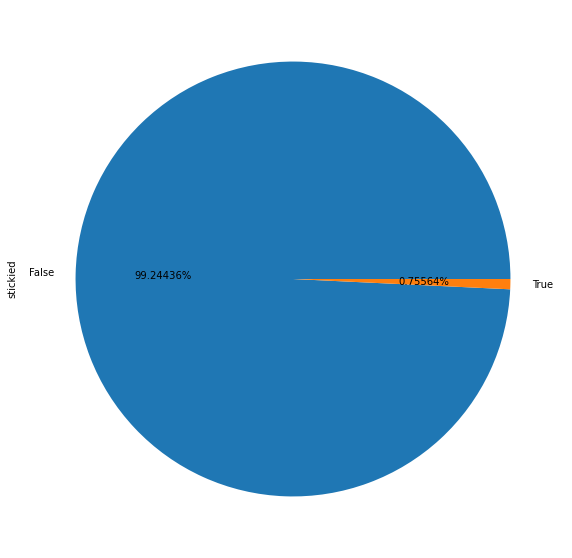

In [13]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [14]:
df["stickied"].unique()

array([False,  True])

In [15]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")

In [16]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    518915
1      3951
Name: stickied, dtype: int64


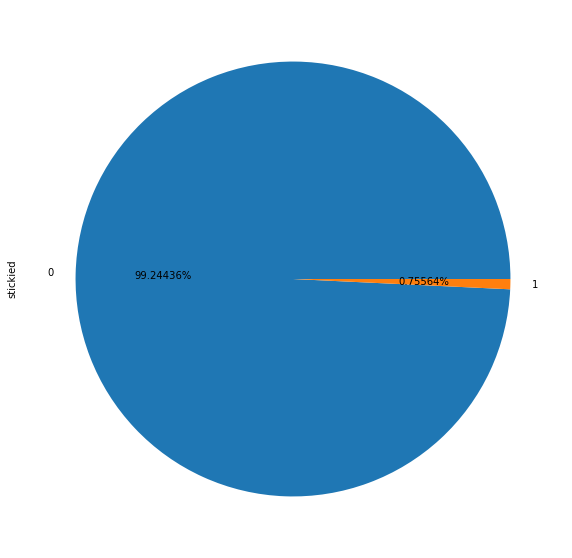

In [17]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# Link_id

t3_k0f4qy    1173
t3_jmpuc6    1063
t3_k01ns4     933
t3_k2y6wy     918
t3_k0u71g     861
             ... 
t3_k1wzwt       1
t3_k1wza1       1
t3_k1wxva       1
t3_jn7gtm       1
t3_k48orx       1
Name: link_id, Length: 42031, dtype: int64


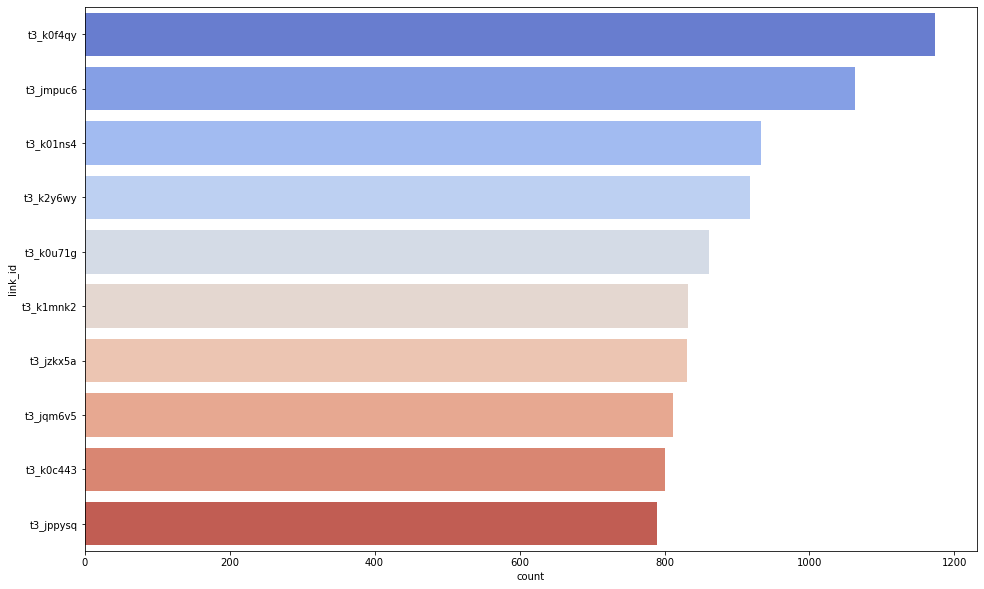

In [18]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [19]:
df[df['link_id'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday


# Subreddit_id

t5_2r0cn    522866
Name: subreddit_id, dtype: int64


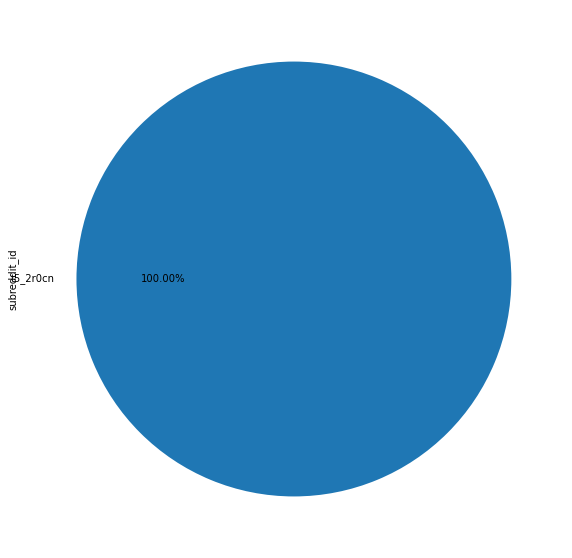

In [20]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [21]:
df[df['subreddit_id'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday


# Author

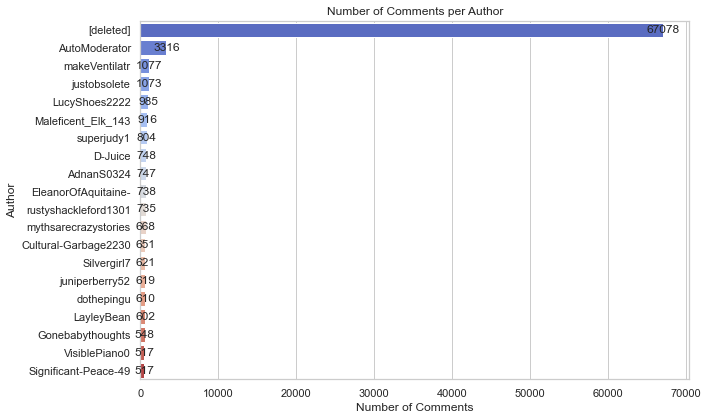

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [23]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday
32,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
57,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
302,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
585,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
978,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522147,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522207,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522308,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN
522320,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,False,1,relationship_advice,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN


In [24]:
df = df[df['author'] != 'AutoModerator']

In [25]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday


# Author flair text

In [26]:
df['author_flair_text'].fillna('0', inplace=True)

0                            504027
Early 30s Female               2053
Early 20s Female               2012
Late 20s Female                1598
40s Male                       1587
Early 20s Male                 1350
Early 30s Male                 1029
Late 30s Female                 760
Early 20s                       675
Late 30s Male                   656
Late 20s Male                   603
40s Female                      599
Teens Male                      564
Teens Female                    539
60+ Male                        354
Early 30s                       267
Late 20s                        243
Verified Crisis Counselor       152
50s Male                        151
Teens                           104
60+ Female                       53
Late 30s                         52
60+                              28
Squire                           23
50s Female                       22
Press Inquiries                  20
misogynistic                     13
40s                         

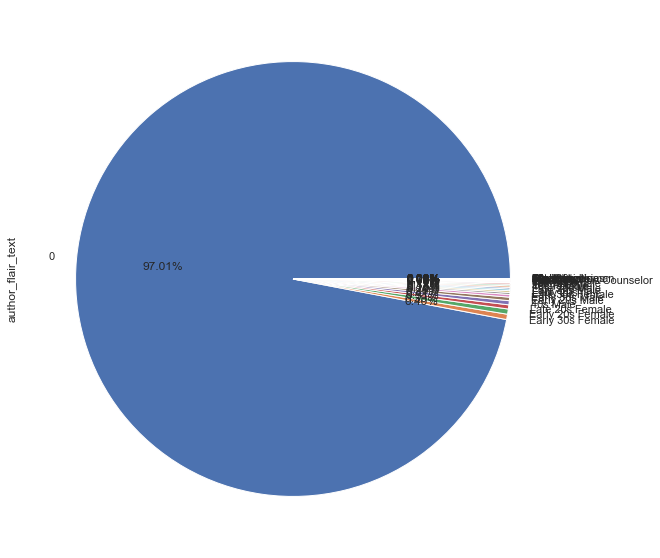

In [27]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationship_advice    519550
Name: subreddit, dtype: int64


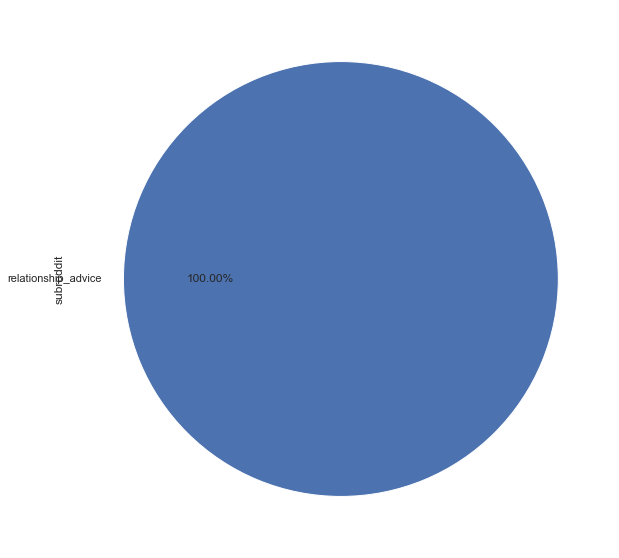

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [29]:
df[df['subreddit'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday


# Created_utc

In [30]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [31]:
df['created_utc']

0        2020-11-01 00:00:01
1        2020-11-01 00:00:03
2        2020-11-01 00:00:05
3        2020-11-01 00:00:06
4        2020-11-01 00:00:07
                 ...        
522861   2020-11-30 23:59:24
522862   2020-11-30 23:59:26
522863   2020-11-30 23:59:37
522864   2020-11-30 23:59:41
522865   2020-11-30 23:59:44
Name: created_utc, Length: 519550, dtype: datetime64[ns]

In [32]:
df[df['created_utc'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

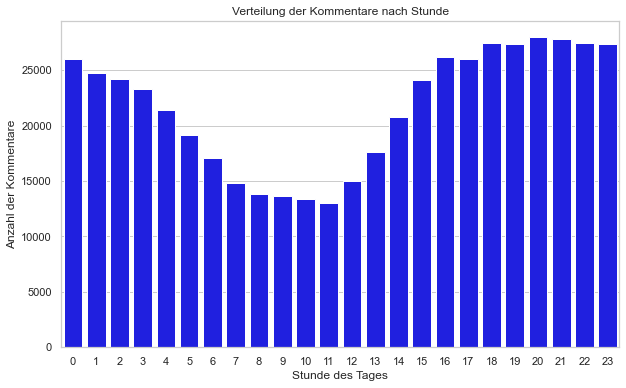

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

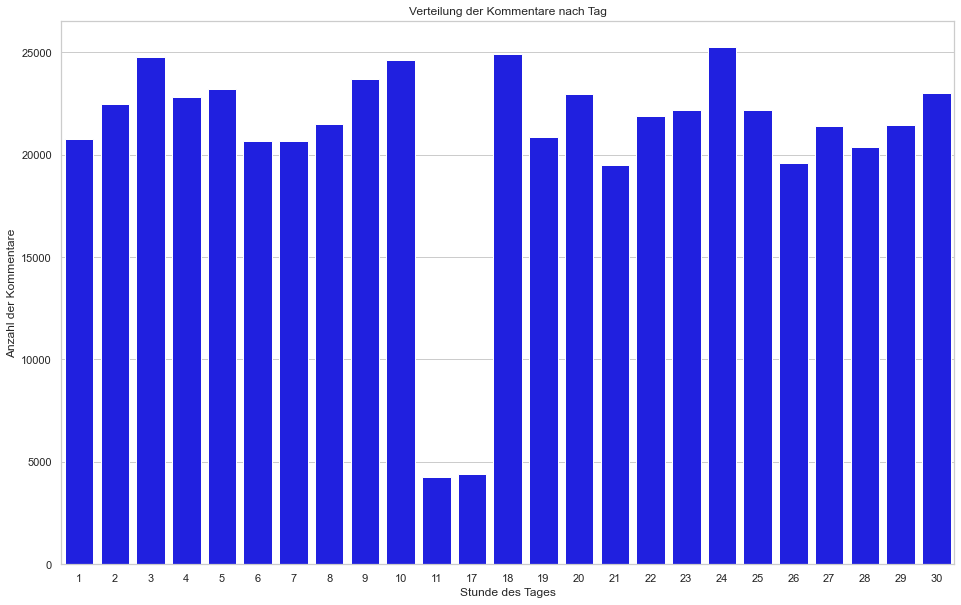

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

In [37]:
df['created_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30])

In [35]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [36]:
df['created_year'].unique()

array([2020])

# Gilded

0    519420
1       120
2         9
3         1
Name: gilded, dtype: int64


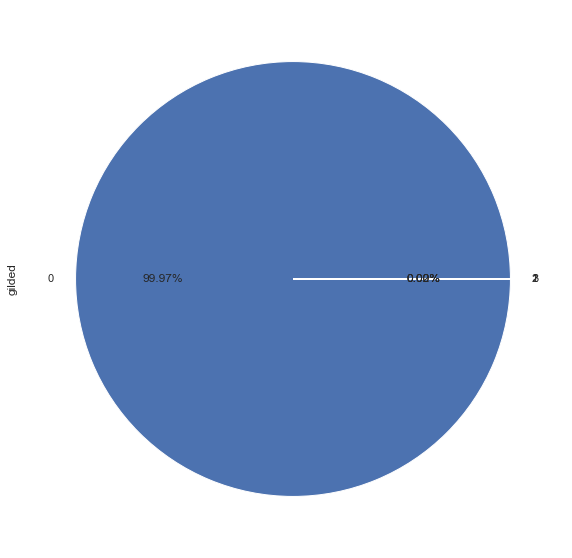

In [38]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [39]:
df["gilded"].unique()

array([0, 1, 2, 3])

In [40]:
df["gilded"] = df["gilded"].replace(0,"0")
df["gilded"] = df["gilded"].replace(1, "1")
df["gilded"] = df["gilded"].replace(2, "2")
df["gilded"] = df["gilded"].replace(3, "3")

0    519420
1       120
2         9
3         1
Name: gilded, dtype: int64


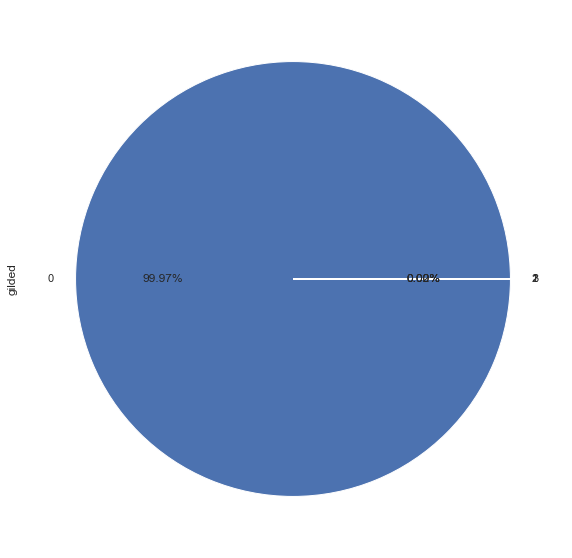

In [41]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

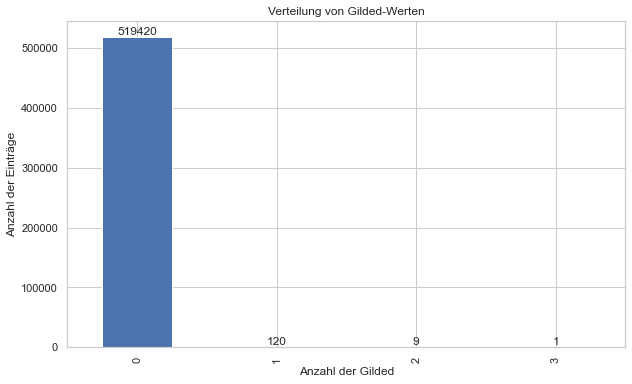

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [43]:
df['distinguished'].fillna('0', inplace=True)

0            518902
moderator       648
Name: distinguished, dtype: int64


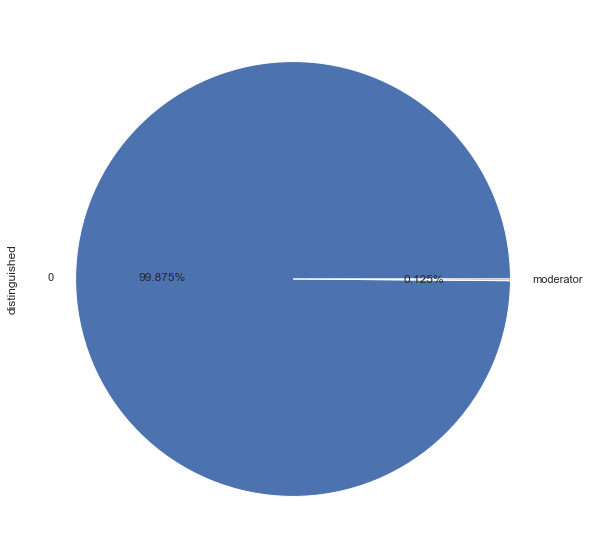

In [44]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [45]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [46]:
 df[df['distinguished'].str.contains('moderator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,created_hour,created_day,created_year
1990,[],NaN,R_Amods,NaN,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,2,1,2020
2013,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",NaN,R_Amods,NaN,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,1,[],NaN,2,1,2020
2267,[],NaN,metastasis_d,1.375317e+09,NaN,NaN,[],NaN,Squire,dark,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,2,1,2020
5128,[],NaN,R_Amods,NaN,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,5,1,2020
5239,[],NaN,R_Amods,NaN,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,5,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518170,[],NaN,R_Amods,NaN,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,20,30,2020
518744,[],NaN,QueenAnneBoleynTudor,1.416091e+09,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,20,30,2020
518925,[],NaN,QueenAnneBoleynTudor,1.416091e+09,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,20,30,2020
519335,[],NaN,R_Amods,NaN,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,20,30,2020


In [83]:
 df[df['distinguished'].str.contains('moderator')]["body"].iloc[0:20]

1990     This post has reached one of our comment/karma...
2013     This post has reached one of our comment/karma...
2267     Hey, /u/Sideshow_A. Thanks for contributing! U...
5128     This post has reached one of our comment/karma...
5239     This post has reached one of our comment/karma...
5497     Hey, /u/thisgirlissues. Thanks for contributin...
5530     Hey, /u/Wi1dFlower. Thanks for contributing! U...
7144     This post has reached one of our comment/karma...
7942     This post has reached one of our comment/karma...
8301     This post has reached one of our comment/karma...
9634     This post has reached one of our comment/karma...
10225    This post has reached one of our comment/karma...
11782    This post has reached one of our comment/karma...
12056    This post has reached one of our comment/karma...
12105    This post has reached one of our comment/karma...
12801    Hey, /u/glitterm_. Thanks for contributing! Un...
12803    Hey, /u/rhro09288292. Thanks for contributing!.

In [84]:
224563 ,250301,436123
behalten_indexe = [224563,250301,436123]

# Lösche die Zeilen, die 'distinguished' den Wert 'moderator' haben, aber nicht in der behalten_indexe-Liste enthalten sind
df = df[~((df['distinguished'] == 'moderator') & (~df.index.isin(behalten_indexe)))]

In [85]:
 df[df['distinguished'].str.contains('moderator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,created_hour,created_day,created_year
224563,[],NaN,QueenAnneBoleynTudor,1.416091e+09,NaN,NaN,[],NaN,0,NaN,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,22,10,2020
250301,[],NaN,eganist,1.285357e+09,NaN,NaN,[],95023d06-57d9-11e8-af87-0e4322199064,Press Inquiries,dark,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,15,18,2020
436123,[],NaN,eganist,1.285357e+09,NaN,NaN,[],95023d06-57d9-11e8-af87-0e4322199064,Press Inquiries,dark,...,t5_2r0cn,r/relationship_advice,public,NaN,0,[],NaN,0,27,2020


0            518902
moderator         3
Name: distinguished, dtype: int64


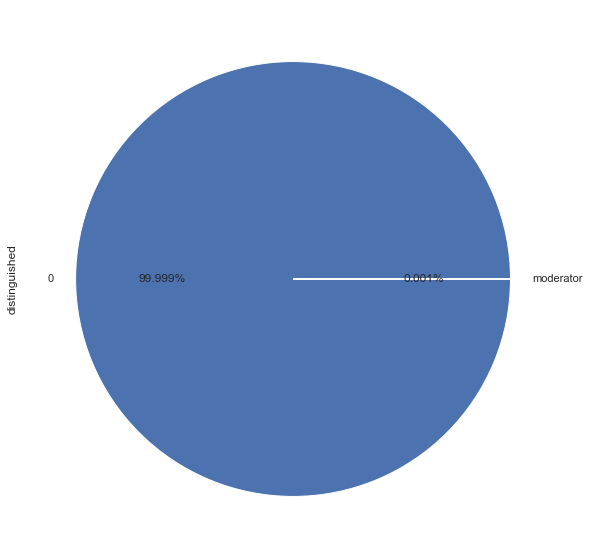

In [86]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [87]:
df["edited"].unique()

array(['False', '1613417367', '1604190260', ..., '1606783502',
       '1606781009', '1606781092'], dtype=object)

In [88]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

In [89]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    502649
1     16256
Name: edited, dtype: int64


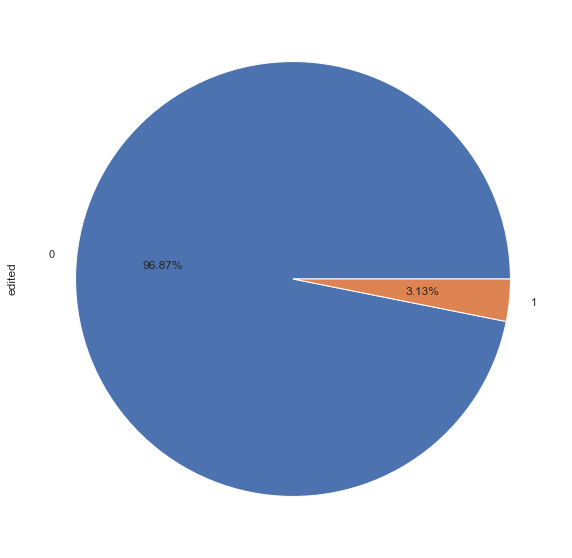

In [90]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [91]:
df[df['edited'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,created_hour,created_day,created_year


# Score

In [92]:
df["score"].value_counts()

1       200962
2        95025
3        44476
0        25166
4        17942
         ...  
817          1
2179         1
1004         1
1779         1
1413         1
Name: score, Length: 1708, dtype: int64

In [93]:
df['score'] = df["score"].astype(int)

In [94]:
df["score"].mean()

10.155280831751476

In [95]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,collapsed_because_crowd_control,comment_type,removal_reason,retrieved_on,score,top_awarded_type,total_awards_received,created_hour,created_day,created_year
count,0.0,1.288490e+05,0.0,0.0,0.0,0.0,5.189050e+05,518905.000000,0.0,518905.000000,518905.000000,518905.000000,518905.0
mean,NaN,1.474327e+09,NaN,NaN,NaN,NaN,1.616978e+09,10.155281,NaN,0.006284,12.225741,15.797354,2020.0
std,NaN,7.416123e+07,NaN,NaN,NaN,NaN,6.844771e+05,83.326560,NaN,0.175918,7.411865,9.678948,0.0
min,NaN,1.127102e+09,NaN,NaN,NaN,NaN,1.615910e+09,-1314.000000,NaN,0.000000,0.000000,1.000000,2020.0
25%,NaN,1.432077e+09,NaN,NaN,NaN,NaN,1.616298e+09,1.000000,NaN,0.000000,5.000000,6.000000,2020.0
50%,NaN,1.500874e+09,NaN,NaN,NaN,NaN,1.617162e+09,2.000000,NaN,0.000000,14.000000,19.000000,2020.0
75%,NaN,1.533574e+09,NaN,NaN,NaN,NaN,1.617596e+09,3.000000,NaN,0.000000,19.000000,24.000000,2020.0
max,NaN,1.554130e+09,NaN,NaN,NaN,NaN,1.618029e+09,6790.000000,NaN,34.000000,23.000000,30.000000,2020.0


In [96]:
df.isnull().sum() 

all_awardings                           0
associated_award                   518905
author                                  0
author_created_utc                 390056
author_flair_background_color      518905
author_flair_css_class             518904
author_flair_richtext               67078
author_flair_template_id           503603
author_flair_text                       0
author_flair_text_color            436349
author_flair_type                   67078
author_fullname                     67078
author_patreon_flair                67078
author_premium                      67078
awarders                                0
body                                    1
can_gild                                0
can_mod_post                            0
collapsed                               0
collapsed_because_crowd_control    518905
collapsed_reason                   506079
comment_type                       518905
controversiality                        0
created_utc                       

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518905 entries, 0 to 522865
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    518905 non-null  object        
 1   associated_award                 0 non-null       float64       
 2   author                           518905 non-null  object        
 3   author_created_utc               128849 non-null  float64       
 4   author_flair_background_color    0 non-null       float64       
 5   author_flair_css_class           1 non-null       object        
 6   author_flair_richtext            451827 non-null  object        
 7   author_flair_template_id         15302 non-null   object        
 8   author_flair_text                518905 non-null  object        
 9   author_flair_text_color          82556 non-null   object        
 10  author_flair_type                451827 non-

# Two Feature Analyses

<AxesSubplot:xlabel='created_hour', ylabel='score'>

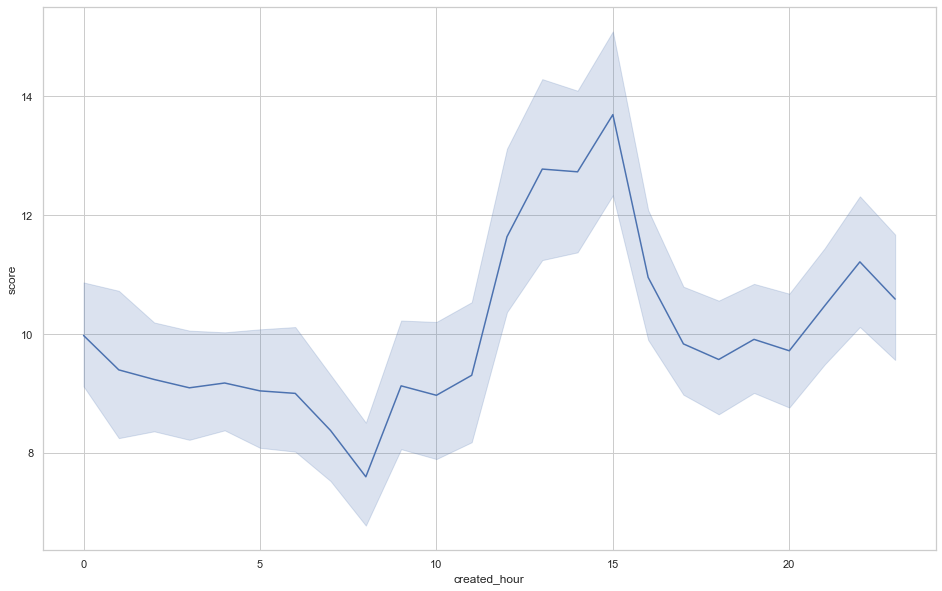

In [98]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs Score

<AxesSubplot:xlabel='created_day', ylabel='score'>

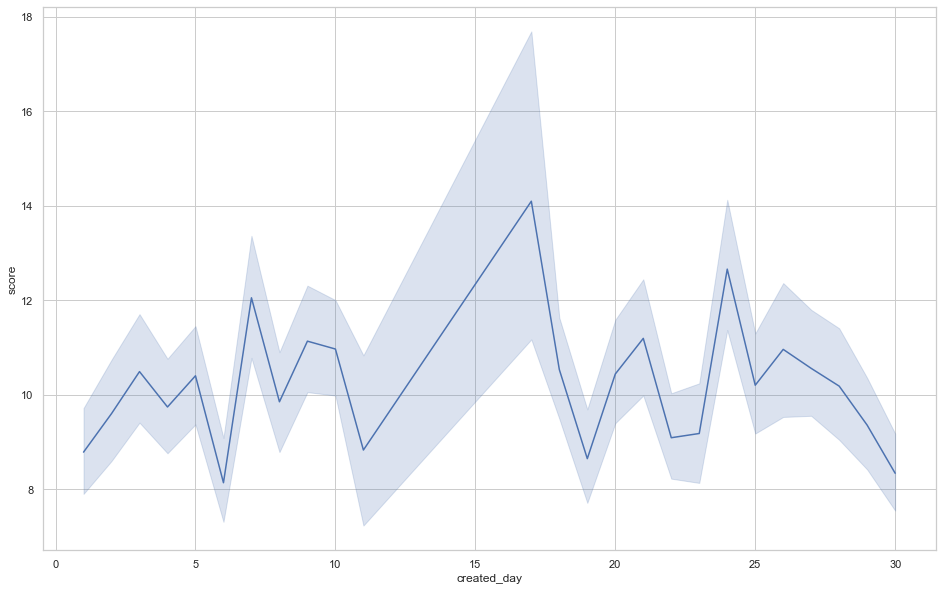

In [99]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

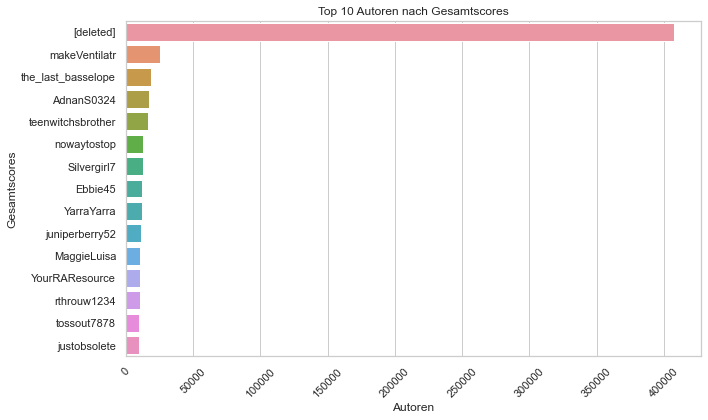

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne deleted

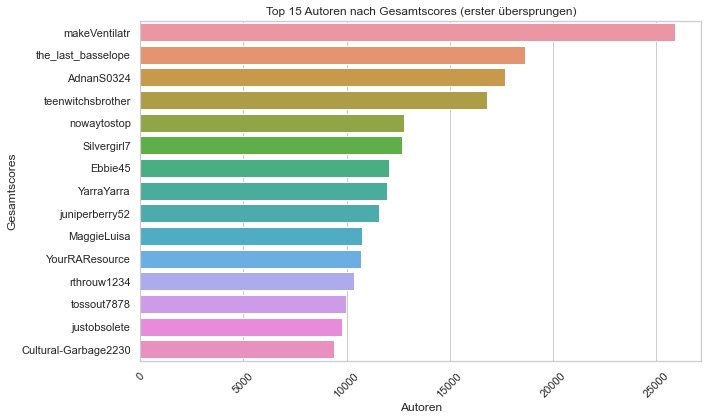

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [102]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [103]:
df=df.drop(["author_flair_background_color","collapsed","collapsed_reason","send_replies"], axis = 1)

In [104]:
df=df.drop(["author_created_utc","author_flair_template_id","author_flair_text_color","author_fullname","can_gild","can_mod_post","gildings","no_follow","removal_reason","subreddit_name_prefixed","author_flair_richtext","author_flair_type","author_patreon_flair"], axis = 1)

In [105]:
df=df.drop(["all_awardings","associated_award","author_premium","awarders","collapsed_because_crowd_control","locked","quarantined","total_awards_received"], axis = 1)

In [106]:
df.columns

Index(['author', 'author_flair_text', 'body', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'id', 'link_id', 'parent_id', 'score', 'stickied', 'top_awarded_type',
       'treatment_tags', 'created_hour', 'created_day', 'created_year'],
      dtype='object')

In [107]:
df=df.drop(["comment_type","top_awarded_type","treatment_tags"], axis = 1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518905 entries, 0 to 522865
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             518905 non-null  object        
 1   author_flair_text  518905 non-null  object        
 2   body               518904 non-null  object        
 3   controversiality   518905 non-null  object        
 4   created_utc        518905 non-null  datetime64[ns]
 5   distinguished      518905 non-null  object        
 6   edited             518905 non-null  object        
 7   gilded             518905 non-null  object        
 8   id                 518905 non-null  object        
 9   link_id            518905 non-null  object        
 10  parent_id          518905 non-null  object        
 11  score              518905 non-null  int64         
 12  stickied           518905 non-null  object        
 13  created_hour       518905 non-null  int64   

In [109]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 1
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Row Deleting

# Delete all comments that have a NA

In [110]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
409518,HTPWTS,0,NaN,0,2020-11-25 17:26:37,0,1,0,gdklg47,t3_k0tfzw,t3_k0tfzw,0,0,17,25,2020


In [112]:
df = df.dropna(subset=['body'])

In [113]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body Analyses and Pre processing 

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

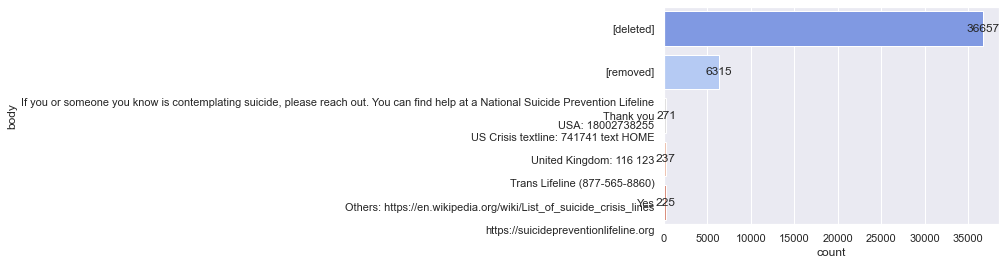

In [115]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:5].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Removed comments mehr likes

In [116]:
filtered_df=df[df['body'] == '[removed]']

In [117]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,6315.000000,6315.000000,6315.000000,6315.0
mean,0.738084,12.359145,15.237213,2020.0
std,46.141409,6.889754,9.862410,0.0
min,-1314.000000,0.000000,1.000000,2020.0
25%,0.000000,6.000000,5.000000,2020.0
50%,1.000000,14.000000,18.000000,2020.0
75%,1.000000,18.000000,24.000000,2020.0
max,2505.000000,23.000000,30.000000,2020.0


In [118]:
len(filtered_df)

6315

Text(0.5, 1.0, 'Histogramm der Scores')

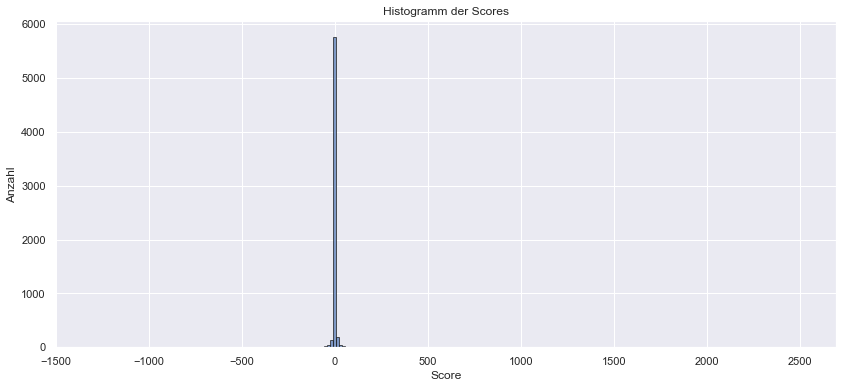

In [119]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed Kommentare löschen

In [120]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

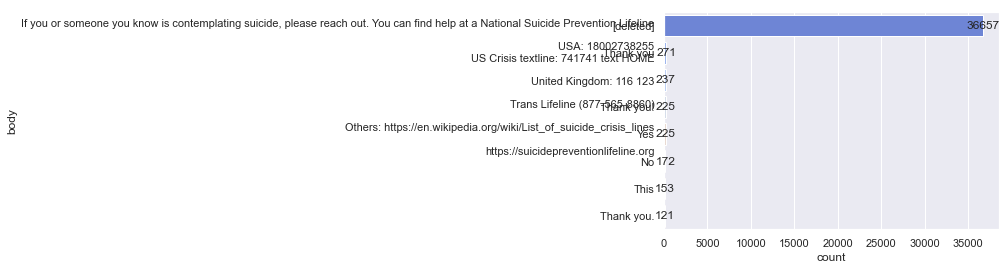

In [121]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Deleted comments mehr likes

In [122]:
filtered_df_del=df[df['body'] == '[deleted]']

In [123]:
filtered_df_del

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
8,[deleted],0,[deleted],0,2020-11-01 00:00:15,0,0,0,gaqv4j0,t3_jlmxdk,t1_gaqu2js,1,0,0,1,2020
10,[deleted],0,[deleted],0,2020-11-01 00:00:30,0,0,0,gaqv5f4,t3_jlsu91,t3_jlsu91,2,0,0,1,2020
21,[deleted],0,[deleted],0,2020-11-01 00:01:37,0,1,0,gaqv99m,t3_jlm4oh,t3_jlm4oh,1,0,0,1,2020
35,[deleted],0,[deleted],0,2020-11-01 00:02:28,0,0,0,gaqvc8l,t3_jlrm2n,t1_gaquav8,-1,0,0,1,2020
44,[deleted],0,[deleted],0,2020-11-01 00:03:01,0,0,0,gaqve4d,t3_jlsi5u,t1_gaquz08,2,0,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522775,[deleted],0,[deleted],0,2020-11-30 23:55:10,0,0,0,ge7e5nn,t3_k48g29,t3_k48g29,1,0,23,30,2020
522778,[deleted],0,[deleted],0,2020-11-30 23:55:12,0,0,0,ge7e5tq,t3_k463zm,t3_k463zm,10,0,23,30,2020
522838,[deleted],0,[deleted],0,2020-11-30 23:58:09,0,0,0,ge7ekdy,t3_k446eh,t3_k446eh,1,0,23,30,2020
522861,[deleted],0,[deleted],0,2020-11-30 23:59:24,0,0,0,ge7eqhp,t3_k48g6m,t1_ge7d8q2,1,0,23,30,2020


In [124]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,36657.000000,36657.000000,36657.000000,36657.0
mean,4.431023,12.249802,16.078975,2020.0
std,44.435484,7.459697,9.644183,0.0
min,-750.000000,0.000000,1.000000,2020.0
25%,1.000000,5.000000,7.000000,2020.0
50%,1.000000,14.000000,19.000000,2020.0
75%,2.000000,19.000000,25.000000,2020.0
max,3377.000000,23.000000,30.000000,2020.0


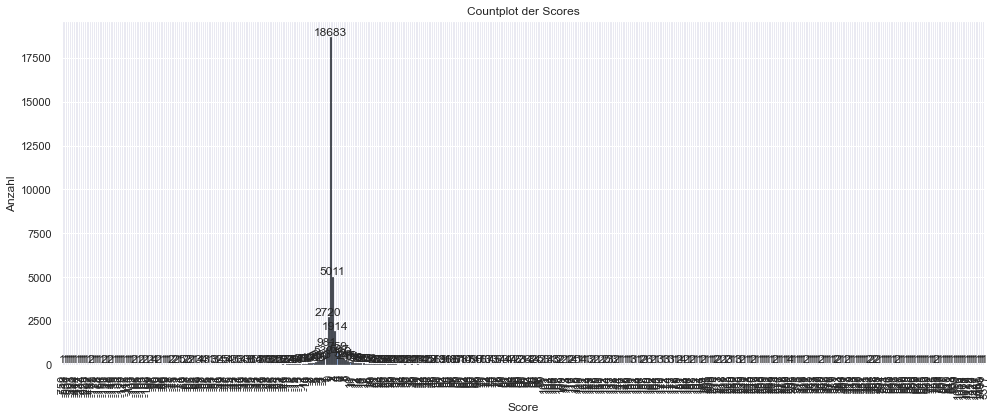

In [125]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()
# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [126]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

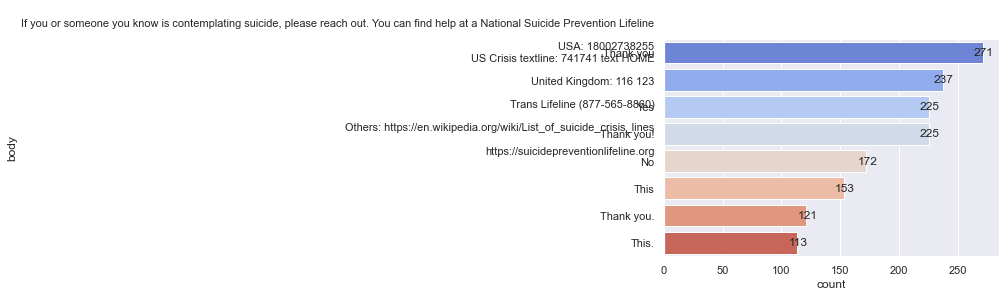

In [127]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [128]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1607,kemgwapo,0,.,0,2020-11-01 01:49:51,0,0,0,gar56d9,t3_jljm2t,t3_jljm2t,1,0,1,1,2020
45680,kemgwapo,0,.,0,2020-11-03 01:59:10,0,0,0,gayn8i7,t3_jmf2fl,t3_jmf2fl,1,0,1,3,2020
61108,HIP06,0,.,0,2020-11-03 17:52:55,0,1,0,gb0y7gm,t3_jncqu5,t3_jncqu5,-5,0,17,3,2020
94409,kemgwapo,0,.,0,2020-11-05 03:23:45,0,0,0,gb6wc95,t3_jo4jyl,t3_jo4jyl,-4,0,3,5,2020
103414,kemgwapo,0,.,0,2020-11-05 15:19:18,0,0,0,gb8giry,t3_joe8x6,t3_joe8x6,1,0,15,5,2020
114451,kemgwapo,0,.,0,2020-11-05 23:42:47,0,0,0,gba9veh,t3_joqi3x,t3_joqi3x,-3,0,23,5,2020
129591,Eklair_,0,.,0,2020-11-06 18:27:32,0,1,0,gbddmzn,t3_jp6l2n,t1_gbd4fet,1,0,18,6,2020
156757,thecowza1,0,.,0,2020-11-08 00:22:33,0,0,0,gbisgit,t3_jq1d63,t3_jq1d63,1,0,0,8,2020
166833,3arthess,0,.,0,2020-11-08 13:50:07,0,1,0,gbm1aas,t3_jq5jv5,t3_jq5jv5,1,0,13,8,2020
179776,kemgwapo,0,.,0,2020-11-09 01:43:06,0,0,0,gbod2dt,t3_jqm6v5,t3_jqm6v5,-7,0,1,9,2020


In [129]:
df = df[df['body'] != '.']

In [130]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [132]:
df[df['body'] == "F"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
64607,coldweathercomics86,0,F,0,2020-11-03 20:34:00,0,0,0,gb1ijwi,t3_jnesmn,t1_gb190ma,3,0,20,3,2020
156059,grandepear21,0,F,0,2020-11-07 23:38:27,0,0,0,gbikqha,t3_jq02gw,t1_gbid8x4,2,0,23,7,2020
173722,maybev3ck,0,F,0,2020-11-08 20:14:28,0,0,0,gbnaybp,t3_jq216a,t3_jq216a,1,0,20,8,2020
309289,drbob4512,0,F,0,2020-11-21 05:41:15,0,0,0,gd0rq0x,t3_jy5jss,t3_jy5jss,1,0,5,21,2020
360332,Hodgy959,0,F,0,2020-11-23 17:21:19,0,0,0,gdcjgy4,t3_jzlsmn,t3_jzlsmn,0,0,17,23,2020
363608,CortezLee,0,F,0,2020-11-23 19:56:51,0,0,0,gdd37k8,t3_jzm646,t3_jzm646,1,0,19,23,2020
386440,TigerBloodCharlie,0,F,0,2020-11-24 18:59:04,0,0,0,gdgzx7m,t3_k0azc7,t1_gdgyj1e,2,0,18,24,2020
425038,lactllzol,0,F,0,2020-11-26 11:00:16,0,0,0,gdnfxea,t3_k1c80q,t1_gdndsvt,0,0,11,26,2020


In [133]:
df = df[df['body'] != 'F']

In [135]:
df[df['body'].str.contains('Remind me!')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
4005,rafwastingtime,0,Remind me!,0,2020-11-01 04:30:19,0,0,0,garic71,t3_jluaa8,t3_jluaa8,1,0,4,1,2020
49349,fifitsa8,0,Remind me! 2 days,0,2020-11-03 05:03:50,0,0,0,gaz5xpz,t3_jn1msj,t3_jn1msj,-1,0,5,3,2020
50022,Ordinary-Dust-1980,0,Remind me! 2 day,0,2020-11-03 05:56:05,0,0,0,gaza2vj,t3_jn1msj,t3_jn1msj,1,0,5,3,2020
50210,Yashioki,0,Remind me! 1 day,0,2020-11-03 06:11:53,0,0,0,gazb8wc,t3_jn1msj,t3_jn1msj,1,0,6,3,2020
50596,NoMoreBeGrieved,0,Remind me! 7 days,0,2020-11-03 06:38:08,0,0,0,gazd34t,t3_jn1msj,t3_jn1msj,0,0,6,3,2020
50647,Domina541,0,Remind me! 7 days,0,2020-11-03 06:42:44,0,0,0,gazdepg,t3_jn1msj,t3_jn1msj,1,0,6,3,2020
51257,Teri1991,0,Remind me! 2 days,0,2020-11-03 07:40:05,0,0,0,gazh4k0,t3_jn1msj,t3_jn1msj,1,0,7,3,2020
51522,Philosophicalchicken,0,Remind me! Tomorrow,0,2020-11-03 08:10:51,0,0,0,gazizas,t3_jn1ctw,t3_jn1ctw,1,0,8,3,2020
51608,Stupid_Individual,0,Remind me! 1 Day,0,2020-11-03 08:19:34,0,0,0,gazji2j,t3_jn1msj,t3_jn1msj,1,0,8,3,2020
71898,Ihatepugsandsausage,0,Remind me! 48 hours,0,2020-11-04 03:08:05,0,0,0,gb2r92o,t3_jndjb4,t3_jndjb4,2,0,3,4,2020


In [136]:
df = df[~df['body'].str.contains('Remind me!')]

In [144]:
df = df[~df['body'].str.contains("Remind me 1 week")]

In [147]:
df = df[~df['body'].str.contains("!remindme")]

In [151]:
df = df[~df['body'].str.contains("!remind")]

In [153]:
df[df['body'].str.contains("!remind me")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

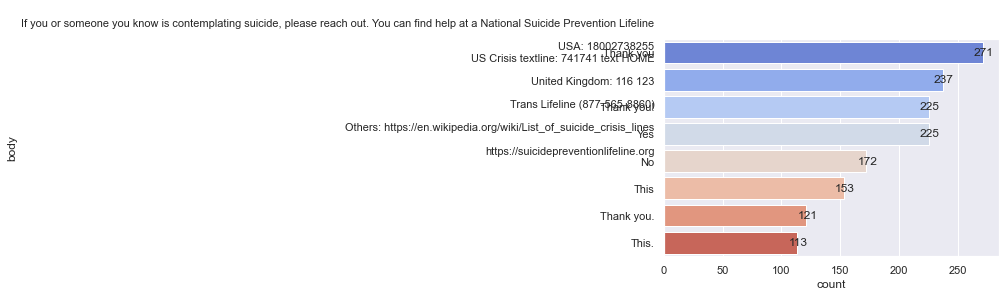

In [154]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [160]:
#df[df['body'].str.contains("If you or someone you know is contemplating suicide")]
#hotlinehelpbot
df[df['author'].str.contains("hotlinehelpbot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
2490,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-01 02:49:54,0,0,0,garaelk,t3_jlvapt,t3_jlvapt,3,0,2,1,2020
5606,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-01 06:32:30,0,0,0,garq2as,t3_jlxyhk,t3_jlxyhk,1,0,6,1,2020
7012,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-01 08:59:00,0,0,0,garxxlu,t3_jlzbt5,t3_jlzbt5,2,0,8,1,2020
7252,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-01 09:18:24,0,0,0,garze5t,t3_jlzii2,t3_jlzii2,1,0,9,1,2020
15215,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-01 19:01:50,0,0,0,gatgshj,t3_jm7suv,t3_jm7suv,3,0,19,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517411,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-30 19:26:46,0,0,0,ge6ev8h,t3_k4342g,t3_k4342g,1,0,19,30,2020
518364,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-30 20:17:19,0,0,0,ge6ldp6,t3_k446x8,t3_k446x8,6,0,20,30,2020
519130,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-30 20:49:28,0,0,0,ge6phjl,t3_k44w4u,t3_k44w4u,1,0,20,30,2020
520969,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2020-11-30 22:26:41,0,0,0,ge71pie,t3_k46wxx,t3_k46wxx,1,0,22,30,2020


In [161]:
df = df[~df['author'].str.contains("hotlinehelpbot")]

In [162]:
df[df['author'].str.contains("hotlinehelpbot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

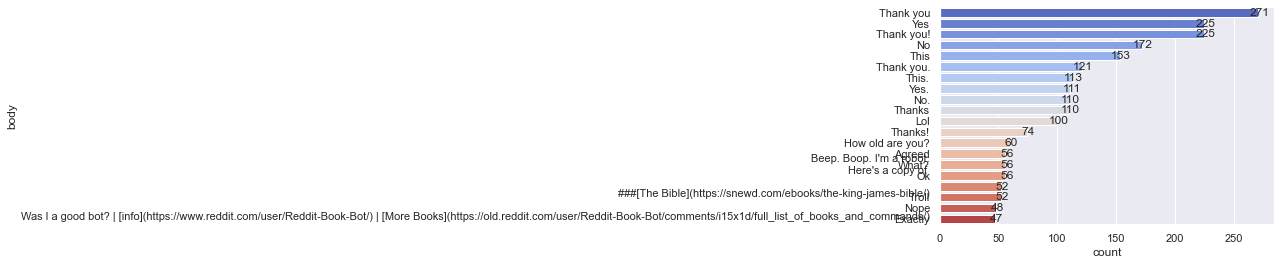

In [164]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:20].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [167]:
df[df['author'].str.contains("Reddit-Book-Bot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
4905,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-01 05:32:27,0,0,0,garmigm,t3_jlnc6o,t1_garmhy1,-5,0,5,1,2020
7845,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-01 10:01:19,0,0,0,gas2fbi,t3_jltftj,t1_gas2exn,4,0,10,1,2020
9602,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-01 12:52:59,0,0,0,gase048,t3_jlq6qt,t1_gasdzi6,3,0,12,1,2020
9674,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-01 12:59:05,0,0,0,gaseilf,t3_jm1p5n,t1_gasehvu,0,0,12,1,2020
13889,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-01 17:36:52,0,0,0,gat6hw8,t3_jm5v20,t1_gat6h76,0,0,17,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506791,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,1,2020-11-30 06:16:41,0,0,0,ge4ihcd,t3_k3pgae,t1_ge4igrq,-1,0,6,30,2020
506931,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-30 06:26:33,0,0,0,ge4j7ad,t3_k3pn0z,t1_ge4j6tj,1,0,6,30,2020
507638,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-30 07:21:59,0,0,0,ge4mzp1,t3_k3m7b4,t1_ge4mz8s,1,0,7,30,2020
510807,Reddit-Book-Bot,0,Beep. Boop. I'm a robot.\nHere's a copy of \n\...,0,2020-11-30 13:24:44,0,0,0,ge593gb,t3_k3vh17,t1_ge592xx,0,0,13,30,2020


In [172]:
df[df['body'].str.contains("Beep.")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5152,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-01 05:51:58,0,1,0,garnpzl,t3_jlw0nt,t3_jlw0nt,21,0,5,1,2020
12972,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-01 16:31:58,0,0,0,gasz7e6,t3_jm3tc6,t3_jm3tc6,6,0,16,1,2020
17189,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-01 21:01:58,0,0,0,gatvvh0,t3_jm6ugd,t3_jm6ugd,1,0,21,1,2020
52359,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-03 09:31:58,0,1,0,gazniyi,t3_jn6xjl,t3_jn6xjl,24,0,9,3,2020
75065,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-04 06:11:58,0,0,0,gb399ar,t3_jnls81,t3_jnls81,2,0,6,4,2020
83640,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",1,2020-11-04 17:51:58,0,0,0,gb4z4zf,t3_jo13cf,t3_jo13cf,0,0,17,4,2020
91697,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-05 00:21:58,0,0,0,gb6bq2t,t3_jo5l4u,t3_jo5l4u,2,0,0,5,2020
94388,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-05 03:21:56,0,0,0,gb6w51l,t3_jo9o2z,t3_jo9o2z,1,0,3,5,2020
98234,Listening70,0,Beep beep beep reverse...\n\nYou are setting y...,0,2020-11-05 08:02:14,0,0,0,gb7jldp,t3_joer61,t3_joer61,3,0,8,5,2020
98514,paragraphiser_bot,0,"Beep boop, I'm [a bot](https://www.mdavis.xyz/...",0,2020-11-05 08:31:57,0,0,0,gb7ldo0,t3_jodg44,t3_jodg44,2,0,8,5,2020


In [168]:
df = df[~df['author'].str.contains("Reddit-Book-Bot")]

In [173]:

df = df[~df['author'].str.contains("paragraphiser_bot")]

In [174]:
df = df[~df['author'].str.contains("Listening70")]

In [175]:
df = df[~df['author'].str.contains("botwasnotanimposter")]

In [176]:
df = df[~df['author'].str.contains("NoGoogleAMPBot")]

In [177]:
df[df['body'].str.contains("Beep.")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

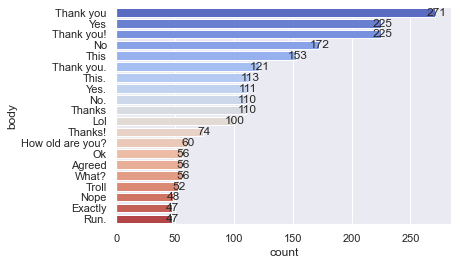

In [178]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:20].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [179]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475362 entries, 0 to 522865
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             475362 non-null  object        
 1   author_flair_text  475362 non-null  object        
 2   body               475362 non-null  object        
 3   controversiality   475362 non-null  object        
 4   created_utc        475362 non-null  datetime64[ns]
 5   distinguished      475362 non-null  object        
 6   edited             475362 non-null  object        
 7   gilded             475362 non-null  object        
 8   id                 475362 non-null  object        
 9   link_id            475362 non-null  object        
 10  parent_id          475362 non-null  object        
 11  score              475362 non-null  int64         
 12  stickied           475362 non-null  object        
 13  created_hour       475362 non-null  int64   

# Http und Http und Redditnames removen

In [180]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [181]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
299,breakfastpitchblende,0,/r/DeadBedrooms,0,2020-11-01 00:20:11,0,0,0,gaqx0qu,t3_jlt26d,t3_jlt26d,1,0,0,1,2020
16587,breakfastpitchblende,0,/r/DeadBedrooms,0,2020-11-01 20:25:52,0,0,0,gatr9ox,t3_jm95tl,t3_jm95tl,1,0,20,1,2020
17926,dlereaux,0,/r/nofap,0,2020-11-01 21:44:20,0,0,0,gau0yrx,t3_jm7j1d,t1_gatn6m8,3,0,21,1,2020
25257,AuntyVenom,0,/r/deadbedrooms,0,2020-11-02 04:39:34,0,0,0,gav9av2,t3_jmh28s,t3_jmh28s,1,0,4,2,2020
68055,breakfastpitchblende,0,/r/DeadBedrooms,0,2020-11-03 23:39:57,0,0,0,gb251rd,t3_jnlmc8,t3_jnlmc8,1,0,23,3,2020
75550,thinginthetub,0,/r/sinkpissers,0,2020-11-04 06:51:13,0,0,0,gb3chlt,t3_jno3x7,t3_jno3x7,4,0,6,4,2020
101795,TangledFogOfYearning,0,/r/mypartneristrans,0,2020-11-05 13:37:56,0,0,0,gb85c5q,t3_joi8gt,t3_joi8gt,4,0,13,5,2020
114492,-LumpySpaceHippo-,0,/r/NothingEverHappens,0,2020-11-05 23:45:19,0,0,0,gbaa6hf,t3_joqi3x,t1_gba1gas,8,0,23,5,2020
127336,[deleted],0,/r/iamverysmart,0,2020-11-06 16:38:44,0,0,0,gbczf3i,t3_jp8bto,t3_jp8bto,3,0,16,6,2020
137458,LukewarmJortz,0,/r/ihavesex,0,2020-11-07 01:57:18,0,0,0,gbeuf8l,t3_jp3k19,t3_jp3k19,3,0,1,7,2020


In [182]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [183]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [184]:
df = df.drop(selected_rows.index)

In [185]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
76,SAHM42,0,https://i.redd.it/85nlauanqcw51.jpg,0,2020-11-01 00:05:01,0,0,0,gaqvkwl,t3_jktc7f,t3_jktc7f,1,0,0,1,2020
235,reconmarine1969,0,https://youtu.be/wSF82AwSDiU,0,2020-11-01 00:15:53,0,0,0,gaqwlz3,t3_jls9yj,t1_gaqt25d,1,0,0,1,2020
54009,wearenothingbutdust,0,https://www.youtube.com/watch?v=7AqteQZ1W1g,0,2020-11-03 11:57:39,0,0,0,gazvudp,t3_jn7qcq,t3_jn7qcq,1,0,11,3,2020
100103,BeautifulWorking6,0,https://lmgtfy.app/?q=maine+age+of+consent,0,2020-11-05 11:14:08,0,0,0,gb7ufqr,t3_joeexk,t1_gb7jfdq,2,0,11,5,2020
103554,cuntfuckwr,0,https://youtu.be/RGrHF-su9v8,0,2020-11-05 15:25:51,0,0,0,gb8hbc4,t3_jobgrm,t1_gb74txh,2,0,15,5,2020
103949,[deleted],0,https://www.youtube.com/watch?v=vZ1D297jles,0,2020-11-05 15:42:09,0,0,0,gb8jc27,t3_jokoo9,t3_jokoo9,0,0,15,5,2020
142702,VisiblePiano0,0,https://images.app.goo.gl/2aGs93AXUbr2WXdZ7,0,2020-11-07 07:56:51,0,0,0,gbfogsn,t3_jpmvik,t1_gbfo3c6,2,0,7,7,2020
153354,BloodyProphecy,0,https://www.google.com/search?sxsrf=ALeKk03oH_...,1,2020-11-07 21:08:35,0,0,0,gbhtmu5,t3_jpy4gh,t1_gbhsmt2,-2,0,21,7,2020
156189,greybye,0,https://www.youtube.com/watch?v=txTEhgReZUA,0,2020-11-07 23:46:06,0,0,0,gbim006,t3_jq0v3o,t3_jq0v3o,1,0,23,7,2020
182756,thecubelife,0,https://youtu.be/TGGA5aWxKKk,0,2020-11-09 04:30:05,0,0,0,gbotwrf,t3_jqn1dp,t1_gbo4yi0,1,0,4,9,2020


In [186]:
df = df.drop(selected_rows_2.index)

In [187]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [188]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1745,New_Y0rker,0,r/confidentlyincorrect,0,2020-11-01 01:59:53,0,0,0,gar62j8,t3_jlm4oh,t1_gar5rqf,7,0,1,1,2020
4049,one_niner,0,r/insaneparents,0,2020-11-01 04:33:24,0,0,0,garik5j,t3_jluaa8,t3_jluaa8,4,0,4,1,2020
4815,frenchfrypie,0,r/hiphopcirclejerk,0,2020-11-01 05:26:01,0,0,0,garm3o0,t3_jlmqo1,t3_jlmqo1,1,0,5,1,2020
5917,aegon132,0,r/shutupOk-Designer-2126,0,2020-11-01 07:07:19,0,0,0,garrx0q,t3_jlt51l,t1_garrfq2,3,0,7,1,2020
12733,ohdeargodnotthisguy,0,r/RaisedByNarcissists,0,2020-11-01 16:16:04,0,0,0,gasxg25,t3_jm4bqw,t3_jm4bqw,1,0,16,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517154,cajunsoul,0,r/wholesome,0,2020-11-30 19:14:57,0,0,0,ge6dcub,t3_hu3e0a,t3_hu3e0a,1,0,19,30,2020
519133,TheFrenchPasta,0,r/nothingeverhappens,0,2020-11-30 20:49:32,0,0,0,ge6pht3,t3_k42wdc,t1_ge6n0yh,6,0,20,30,2020
519420,EleanorOfAquitaine-,0,r/offmychest,0,2020-11-30 21:02:46,0,0,0,ge6r5nm,t3_k3wwr0,t1_ge6r329,1,0,21,30,2020
519910,ThrowRAcq4444,0,r/AskMenOver30,0,2020-11-30 21:28:31,0,0,0,ge6ud2r,t3_k45lbd,t3_k45lbd,2,0,21,30,2020


In [189]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [190]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [191]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [192]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5873,ew_pickles,0,https://www.reddit.com/r/AmItheAsshole/comment...,0,2020-11-01 07:02:16,0,0,0,garrnds,t3_jlt51l,t1_garkiqr,3,0,7,1,2020
7958,2catsaretheminimum,0,https://www.thehotline.org/,0,2020-11-01 10:11:05,0,0,0,gas337y,t3_jlw0nt,t3_jlw0nt,1,0,10,1,2020
8478,BeneficialProfile442,0,https://en.m.wikipedia.org/wiki/Surreal_humour,0,2020-11-01 11:00:43,0,0,0,gas6bb1,t3_jlt51l,t1_gas602c,2,0,11,1,2020
18834,McBackstabber,0,https://www.reddit.com/r/funny/comments/3txkhp...,0,2020-11-01 22:30:10,0,0,0,gau6bh6,t3_jm1ywq,t1_gau2kec,14,0,22,1,2020
19910,alicat2308,0,https://www.reddit.com/r/funny/comments/3txkhp...,0,2020-11-01 23:18:12,0,0,0,gaubteo,t3_jm1ywq,t1_gau9he0,9,0,23,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477306,I4getstuff,0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,0,2020-11-28 23:17:12,0,0,0,gdxxbi3,t3_k2ri1n,t1_gdxvz42,3,0,23,28,2020
482973,GlitterDrunk,0,https://www.reddit.com/r/tifu/comments/2tdbig/...,0,2020-11-29 04:49:01,0,0,0,gdz860h,t3_k2ta4c,t1_gdz826b,3,0,4,29,2020
486483,IndomitableINFJ,0,https://zendoproject.org/resources/,0,2020-11-29 09:42:59,0,0,0,ge09ido,t3_k36rfe,t3_k36rfe,2,0,9,29,2020
488210,MoG5z,0,https://www.bbc.co.uk/news/uk-scotland-55065071,0,2020-11-29 12:59:45,0,0,0,ge0y5vj,t3_k339vt,t1_gdzeizu,1,0,12,29,2020


In [193]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [194]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [195]:
df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [196]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_69069/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
64,wikipedia_answer_bot,0,"""Agree to disagree"" or ""agreeing to disagree"" ...",0,2020-11-01 00:04:20,0,0,0,gaqvikr,t3_jlspqq,t1_gaqvhvi,2,0,0,1,2020
5457,linebreaker-bot,0,&gt;So me and my gf have been together 7 and a...,0,2020-11-01 06:18:54,0,0,0,garpaz4,t3_jlxtib,t3_jlxtib,1,0,6,1,2020
5866,LEGOmaniac66,0,Good bot!,0,2020-11-01 07:01:33,0,0,0,garrm0f,t3_jlw0nt,t1_garnpzl,12,0,7,1,2020
6273,Joshfilipino,0,I don’t reply to anyone unless it’s someone I ...,0,2020-11-01 07:45:18,0,0,0,gartx2i,t3_jlyl5u,t3_jlyl5u,2,0,7,1,2020
7565,Samurai_TwoSeven,0,&gt;u/ra\n\nCheck the guy's post/comment histo...,0,2020-11-01 09:41:46,0,0,0,gas13kr,t3_jlzjxw,t1_gas0k47,2,0,9,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510924,BrilliantCarrot1,0,Bad bot,0,2020-11-30 13:34:39,0,0,0,ge59wuk,t3_k3vh17,t1_ge593gb,2,0,13,30,2020
511237,[deleted],0,"Wait, no ... \n\n&amp;#x200B;\n\nDo you know w...",0,2020-11-30 13:57:25,0,0,0,ge5bx02,t3_k3kq4a,t3_k3kq4a,3,0,13,30,2020
512762,wikipedia_answer_bot,0,"Bumble may refer to:\n\nBumble (app), an onlin...",0,2020-11-30 15:41:14,0,0,0,ge5mq1g,t3_k3x3y1,t1_ge5mowh,5,0,15,30,2020
513165,linebreaker-bot,0,&gt;We have had a very complicated on and off ...,0,2020-11-30 16:03:42,0,0,0,ge5pfky,t3_k3ylfo,t3_k3ylfo,1,0,16,30,2020


In [225]:
bot_in_body_rows.iloc[200:220]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
249209,linebreaker-bot,0,&gt;My partner 22M and me 28F were best friend...,0,2020-11-18 15:06:45,0,0,0,gcq2nn5,t3_jwhdpz,t3_jwhdpz,2,0,15,18,2020
249278,ChangeTheFocus,0,bad bot,0,2020-11-18 15:09:57,0,0,0,gcq30zt,t3_jwafko,t1_gcpezq2,14,0,15,18,2020
250640,throwraproblemms,0,Bad bot,0,2020-11-18 16:17:24,0,0,0,gcqb6rk,t3_jwafko,t1_gcpezq2,7,0,16,18,2020
251616,rickroll-counter,0,Hello! This comment contains the most dangerou...,0,2020-11-18 17:19:53,0,0,0,gcqj438,t3_jwi3he,t1_gcqj2z6,16,0,17,18,2020
251619,rickroll-counter,0,Hello! This comment contains the most dangerou...,0,2020-11-18 17:20:04,0,0,0,gcqj4xa,t3_jwi3he,t1_gcqj3xv,7,0,17,18,2020
251652,rickroll-counter,0,Hello! This comment contains the most dangerou...,0,2020-11-18 17:21:39,0,0,0,gcqjcb5,t3_jwicyj,t1_gcqjb9y,1,0,17,18,2020
251815,rickroll-counter,0,Hello! This comment contains the most dangerou...,0,2020-11-18 17:28:53,0,0,0,gcqk9m6,t3_jwii44,t1_gcqk8kj,2,0,17,18,2020
252205,makeVentilatr,0,I consider myself more of a glorified link bot...,0,2020-11-18 17:48:39,0,1,0,gcqms2s,t3_jw0o6g,t1_gcpi38b,3,0,17,18,2020
252412,katniss12794,0,Good bot!,0,2020-11-18 17:59:12,0,0,0,gcqo5fm,t3_jwi3he,t1_gcqj438,8,0,17,18,2020
254956,VertigoDelight,0,Good bot,0,2020-11-18 19:48:12,0,0,0,gcr22kp,t3_jweuhh,t1_gcqyo1c,41,0,19,18,2020


In [ ]:
#"wikipedia_answer_bot","B0tRank","couldshouldwouldbot","nicebot2","AmputatorBot","rickroll-counter","Post_To_SPS_Warning","morse-bot","linebreaker-bot",""

In [201]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["Bot_Metric","paragraphiser_bot","PORTMANTEAU-BOT","TotesMessenger","RemindMeBot","RAdviceBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [226]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["wikipedia_answer_bot","B0tRank","couldshouldwouldbot","nicebot2","AmputatorBot","rickroll-counter","Post_To_SPS_Warning","morse-bot","linebreaker-bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [227]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["userleansbot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [228]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_69069/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5866,LEGOmaniac66,0,Good bot!,0,2020-11-01 07:01:33,0,0,0,garrm0f,t3_jlw0nt,t1_garnpzl,12,0,7,1,2020
6273,Joshfilipino,0,I don’t reply to anyone unless it’s someone I ...,0,2020-11-01 07:45:18,0,0,0,gartx2i,t3_jlyl5u,t3_jlyl5u,2,0,7,1,2020
7565,Samurai_TwoSeven,0,&gt;u/ra\n\nCheck the guy's post/comment histo...,0,2020-11-01 09:41:46,0,0,0,gas13kr,t3_jlzjxw,t1_gas0k47,2,0,9,1,2020
7997,Whatcrysis,0,Bot probably. Not even a very good one.,0,2020-11-01 10:14:18,0,0,0,gas3bir,t3_jlzjxw,t1_gas13kr,1,0,10,1,2020
8240,[deleted],0,good bot,0,2020-11-01 10:38:00,0,0,0,gas51n8,t3_jltqnm,t1_garri0e,1,0,10,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509713,Infused_Savagery,0,No I am not saying that stop putting words int...,1,2020-11-30 11:27:25,0,0,0,ge5171r,t3_k3t7qf,t1_ge5071y,4,0,11,30,2020
509787,tossout7878,0,"are you sure you don't want to ask us if ""Girl...",0,2020-11-30 11:36:10,0,0,0,ge51pcv,t3_k3ttgb,t1_ge50ey7,1,0,11,30,2020
510924,BrilliantCarrot1,0,Bad bot,0,2020-11-30 13:34:39,0,0,0,ge59wuk,t3_k3vh17,t1_ge593gb,2,0,13,30,2020
511237,[deleted],0,"Wait, no ... \n\n&amp;#x200B;\n\nDo you know w...",0,2020-11-30 13:57:25,0,0,0,ge5bx02,t3_k3kq4a,t3_k3kq4a,3,0,13,30,2020


In [229]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [230]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [231]:
 df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [232]:
df_bot=pd.read_csv("bot_names.csv")

In [233]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [234]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [235]:
df_check_bot

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
12,Drexelhand,0,"idk, i never met an aries who has stitches. sh...",0,2020-11-01 00:00:44,0,0,0,gaqv66d,t3_jlrorf,t3_jlrorf,2,0,0,1,2020
124,mcdhotte,0,"he’s fantasizing about murdering, raping and d...",0,2020-11-01 00:08:10,0,1,0,gaqvvrz,t3_jlk2dz,t1_gaqjmsp,5,0,0,1,2020
181,SupahBlue,0,Ex's are Ex's for a reason. Don't do this to y...,0,2020-11-01 00:11:57,0,0,0,gaqw8se,t3_jlt1j1,t3_jlt1j1,2,0,0,1,2020
218,TheRedMage4444,0,Yeah. Good luck on that relationship bud,0,2020-11-01 00:14:50,0,0,0,gaqwify,t3_jlrorf,t3_jlrorf,2,0,0,1,2020
251,its_justme,0,The H makes it even better imo lol,0,2020-11-01 00:16:47,0,0,0,gaqwp2i,t3_jlmqo1,t1_gaqiopc,2,0,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522689,beeredditor,0,"Meh, just give her time until she comes around...",0,2020-11-30 23:51:04,0,0,0,ge7dkzg,t3_k3z2wf,t3_k3z2wf,-5,0,23,30,2020
522691,rubyshot,0,Oh shit \nConfront him about it and if he gets...,0,2020-11-30 23:51:13,0,0,0,ge7dlqe,t3_k48kbw,t1_ge7dbpg,0,0,23,30,2020
522700,8Ariadnesthread8,0,I don't know but he treats you like shit so fo...,0,2020-11-30 23:51:44,0,0,0,ge7do9z,t3_k47b4t,t1_ge7amlu,1,0,23,30,2020
522710,redditavenger2019,0,Rightfully so.,0,2020-11-30 23:52:31,0,0,0,ge7ds8g,t3_k480wo,t1_ge7cfhv,28,0,23,30,2020


In [236]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
4105,converter-bot,0,8 lbs is 3.63 kg,0,2020-11-01 04:37:48,0,0,0,garivkg,t3_jlvdoy,t1_gariukd,1,0,4,1,2020
5287,converter-bot,0,2 lbs is 0.91 kg,0,2020-11-01 06:02:30,0,0,0,garod1d,t3_jlvdoy,t1_garoccu,4,0,6,1,2020
5847,converter-bot,0,70 mph is 112.65 km/h,0,2020-11-01 06:59:28,0,0,0,garri0e,t3_jltqnm,t1_garrhle,1,0,6,1,2020
6654,converter-bot,0,200 lbs is 90.8 kg,0,2020-11-01 08:21:04,0,0,0,garvqf7,t3_jlvdoy,t1_garvpyb,2,0,8,1,2020
6805,tiny_smile_bot,0,&gt;:)\n\n:),0,2020-11-01 08:36:22,0,0,0,garwi07,t3_jlz04e,t1_garwh5n,3,0,8,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518709,reddit_toast_bot,0,I'd check your shampoo and toothbrush too. Gr...,0,2020-11-30 20:32:10,0,0,0,ge6nb0s,t3_k3y3c4,t1_ge5z6rl,6,0,20,30,2020
518829,reddit_toast_bot,0,"Yeah, its common for people to do it (usually ...",0,2020-11-30 20:36:49,0,0,0,ge6nwd9,t3_k41mrh,t3_k41mrh,4,0,20,30,2020
519054,reddit_toast_bot,0,"It could be weird. On the other hand, if you ...",0,2020-11-30 20:45:51,0,0,0,ge6p1bc,t3_k448qq,t3_k448qq,0,0,20,30,2020
519325,reddit_toast_bot,0,I've seen a couple posts on here from adult da...,0,2020-11-30 20:57:36,0,0,0,ge6qi4t,t3_k3nnfb,t1_ge448a0,3,0,20,30,2020


In [247]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[200:212]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
509186,tiny_smile_bot,0,&gt;:)\n\n:),0,2020-11-30 10:13:32,0,0,0,ge4x4g8,t3_k3sxzo,t1_ge4x3rn,1,0,10,30,2020
509758,tiny_smile_bot,0,&gt;:)\n\n:),0,2020-11-30 11:33:33,0,0,0,ge51jww,t3_k3ts50,t1_ge51j0q,1,0,11,30,2020
518486,reddit_toast_bot,0,"Sorry but it's already over, but you already k...",0,2020-11-30 20:22:46,0,0,0,ge6m39h,t3_k3wjij,t3_k3wjij,1,0,20,30,2020
518508,reddit_toast_bot,0,"Well, on behalf of the nanny, older guy walkin...",0,2020-11-30 20:23:46,0,0,0,ge6m7wy,t3_k3jmyk,t3_k3jmyk,1,0,20,30,2020
518529,reddit_toast_bot,0,"She may love you, but she is not really ready ...",1,2020-11-30 20:25:01,0,0,0,ge6mdue,t3_k3z2wf,t3_k3z2wf,1,0,20,30,2020
518645,reddit_toast_bot,0,"Abuse, toxic, chronic liar, narcissist, using ...",0,2020-11-30 20:30:09,0,0,0,ge6n1qb,t3_k41kdn,t3_k41kdn,2,0,20,30,2020
518709,reddit_toast_bot,0,I'd check your shampoo and toothbrush too. Gr...,0,2020-11-30 20:32:10,0,0,0,ge6nb0s,t3_k3y3c4,t1_ge5z6rl,6,0,20,30,2020
518829,reddit_toast_bot,0,"Yeah, its common for people to do it (usually ...",0,2020-11-30 20:36:49,0,0,0,ge6nwd9,t3_k41mrh,t3_k41mrh,4,0,20,30,2020
519054,reddit_toast_bot,0,"It could be weird. On the other hand, if you ...",0,2020-11-30 20:45:51,0,0,0,ge6p1bc,t3_k448qq,t3_k448qq,0,0,20,30,2020
519325,reddit_toast_bot,0,I've seen a couple posts on here from adult da...,0,2020-11-30 20:57:36,0,0,0,ge6qi4t,t3_k3nnfb,t1_ge448a0,3,0,20,30,2020


In [248]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["converter-bot","tiny_smile_bot","happy-cake-day-bot-","wikipedia_text_bot","ordinarybots","emojifyemojifier_bot","resavr_bot","EncouragementRobot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [249]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["EncouragementRobot","resavr_bot","cool-acronym-bot","	the_timezone_bot","tiny_smile_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]


In [250]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["kzreminderbot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [251]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["resavr_bot","societybot","by-accident-bot","morse-bot","icarebot","EncouragementRobot","trump_bot_cares","table_it_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [252]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["ordinarybots"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [253]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot","WikiTextBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [254]:
df_check_bot[df_check_bot['author'].str.contains('WaterIsWetBot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [256]:
df_check_bot[df_check_bot['author'].str.contains('Youtube')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [257]:
df[df['author'].str.contains("RedditSilverRobot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [258]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [259]:
df_check_bot[df_check_bot['author'].str.contains('Bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
409,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-01 00:27:10,0,0,0,gaqxo8q,t3_jlsxa8,t1_gaqxnft,-1,0,0,1,2020
5270,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-01 06:01:13,0,0,0,garoa89,t3_jluyce,t1_garo9sr,1,0,6,1,2020
6718,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-01 08:27:34,0,0,0,garw1ys,t3_jlvr92,t1_garw1la,0,0,8,1,2020
7109,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-01 09:07:37,0,0,0,garymdj,t3_jlvdoy,t1_garylw9,1,0,9,1,2020
7940,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-01 10:09:44,0,0,0,gas2zk7,t3_jlxs7f,t1_gas2yzq,1,0,10,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515411,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-30 17:42:22,0,0,0,ge61lre,t3_k3kq4a,t1_ge61kvz,1,0,17,30,2020
515558,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-30 17:49:49,0,0,0,ge62iz2,t3_k40cly,t1_ge62hw9,1,0,17,30,2020
516359,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-30 18:34:01,0,0,0,ge683gb,t3_k3nbye,t1_ge682f8,1,0,18,30,2020
520600,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-30 22:06:40,0,0,0,ge6z681,t3_k45k7s,t1_ge6z5bn,1,0,22,30,2020


In [275]:
df_check_bot[df_check_bot['author'].str.contains('Bot')].iloc[300:303]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
520600,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-30 22:06:40,0,0,0,ge6z681,t3_k45k7s,t1_ge6z5bn,1,0,22,30,2020
522621,LinkifyBot,0,**I found links in your comment that were not ...,0,2020-11-30 23:47:33,0,0,0,ge7d3dw,t3_k3xa6k,t1_ge7d298,2,0,23,30,2020


In [276]:
df[df['author'] == 'NendoBot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
394676,NendoBot,0,Thank you this helps a lot :),0,2020-11-25 00:43:20,0,0,0,gdi5bi4,t3_k0hcuq,t1_gdi3szv,1,0,0,25,2020
394682,NendoBot,0,Thank you :) i understand more clearly now,0,2020-11-25 00:43:36,0,0,0,gdi5cld,t3_k0hcuq,t1_gdi3yfx,2,0,0,25,2020
394691,NendoBot,0,"Thank you, i understand now :)",0,2020-11-25 00:44:00,0,0,0,gdi5e4x,t3_k0hcuq,t1_gdi551l,1,0,0,25,2020


In [277]:


# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["HelperBot_","LimbRetrieval-Bot","TitleLinkHelperBot","UpdateMeBot","LinkifyBot","EmojifierBot","AbbrevTranslatorBot","RumDuckBot","Generic_Reddit_Bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [278]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["BananaFactBot","_whatbot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [279]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
193619,sgt_bertand,0,You obviously realize you are in an abusive re...,0,2020-11-09 17:49:11,0,0,0,gbqly91,t3_jr1yf4,t3_jr1yf4,1,0,17,9,2020
354670,emilkyway,0,Me and my husband always use each others phone...,0,2020-11-23 09:59:40,0,0,0,gdbh9l6,t3_jzesgt,t3_jzesgt,1,0,9,23,2020
512870,AnonTxHeathen,0,Ever had someone you love catfished? Ever watc...,0,2020-11-30 15:48:18,0,0,0,ge5nkn7,t3_k3j34e,t1_ge39svl,2,0,15,30,2020


In [280]:
 #Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["B0tRank","Dx_Meme_Bot_xD","ghost_of_dongerbot","UpdateMeBot","HelperBot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("relationship_advise_20_comments_EDA_clean.csv",sep=",")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474455 entries, 0 to 474454
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             474455 non-null  object
 1   author_flair_text  474455 non-null  object
 2   body               474455 non-null  object
 3   controversiality   474455 non-null  int64 
 4   created_utc        474455 non-null  object
 5   distinguished      474455 non-null  object
 6   edited             474455 non-null  int64 
 7   gilded             474455 non-null  int64 
 8   id                 474455 non-null  object
 9   link_id            474455 non-null  object
 10  parent_id          474455 non-null  object
 11  score              474455 non-null  int64 
 12  stickied           474455 non-null  int64 
 13  created_hour       474455 non-null  int64 
 14  created_day        474455 non-null  int64 
 15  created_year       474455 non-null  int64 
dtypes: int64(8), object(

In [5]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       I broke up with a boyfriend of two years at ar...   
1       Sounds like your dad is not perfect, but he su...   
2       keep fantasising about how women should act fr...   
3       Dump his ass. Find someone who is crazy about ...   
4       I know just the person. She's a good friend an...   
...                                                   ...   
474450  Again I’m not talking about what happened toda...   
474451  so even after drinking a lot of alcohol with h...   
474452                          I’m sorry for your loss 😢   
474453  That’s fair. I’m just a super guilty person so...   
474454  Well that’s not as bad as I first suspected. I...   

                                               clean_text  
0       I broke up with a boyfriend of two years at ar...  
1       Sounds like your dad is not perfect but he sur...  
2       keep fantasising about how women should act fr...  
3       Dump his ass . Find

In [7]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [8]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
1010,Jhinkah,Early 30s Female,1,0,2020-11-01 01:15:45,0,0,0,gar24ef,t3_jlty59,t3_jlty59,3,0,1,1,2020,,0
2006,totemojakku,0,:^(,0,2020-11-01 02:31:11,0,0,0,gar8tmt,t3_jlthp4,t1_gar6sy1,2,0,2,1,2020,,0
2182,justobsolete,0,,0,2020-11-01 02:46:30,0,0,0,gara4h6,t3_jlv2u4,t3_jlv2u4,2,0,2,1,2020,,0
4442,mythsarecrazystories,0,,0,2020-11-01 05:32:47,0,0,0,garmj82,t3_jlnc6o,t1_garlup7,2,0,5,1,2020,,0
4884,Chevalier_Kiwi,0,20,0,2020-11-01 06:13:59,0,0,0,garp165,t3_jlxqp1,t1_garox3s,1,0,6,1,2020,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470905,AbyssWalker321,0,20+,0,2020-11-30 20:42:32,0,0,0,ge6om24,t3_k44afg,t1_ge6mij9,1,0,20,30,2020,,0
472763,makeVentilatr,0,,0,2020-11-30 22:29:42,0,0,0,ge7252y,t3_k4394n,t1_ge6g746,3,0,22,30,2020,,0
473710,redditman87689,0,^,0,2020-11-30 23:21:23,0,0,0,ge79gzp,t3_k47l3k,t1_ge77dk0,1,0,23,30,2020,,0
473784,RealPinky,0,+1,0,2020-11-30 23:25:32,0,0,0,ge7a1ow,t3_k3scrz,t1_ge5v78j,2,0,23,30,2020,,0


In [9]:
df = df[df['comment_len'] != 0]

# Final EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474003 entries, 0 to 474454
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             474003 non-null  object
 1   author_flair_text  474003 non-null  object
 2   body               474003 non-null  object
 3   controversiality   474003 non-null  int64 
 4   created_utc        474003 non-null  object
 5   distinguished      474003 non-null  object
 6   edited             474003 non-null  int64 
 7   gilded             474003 non-null  int64 
 8   id                 474003 non-null  object
 9   link_id            474003 non-null  object
 10  parent_id          474003 non-null  object
 11  score              474003 non-null  int64 
 12  stickied           474003 non-null  int64 
 13  created_hour       474003 non-null  int64 
 14  created_day        474003 non-null  int64 
 15  created_year       474003 non-null  int64 
 16  clean_text         4

In [11]:
df.describe()

,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,474003.000000,474003.000000,474003.000000,474003.000000,474003.000000,474003.000000,474003.000000,474003.0,474003.000000
mean,0.025314,0.023013,0.000295,10.748740,0.000004,12.224277,15.783811,2020.0,59.680198
std,0.157078,0.149943,0.018598,86.103295,0.002054,7.415400,9.678400,0.0,71.614876
min,0.000000,0.000000,0.000000,-969.000000,0.000000,0.000000,1.000000,2020.0,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000,2020.0,17.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,14.000000,19.000000,2020.0,38.000000
75%,0.000000,0.000000,0.000000,3.000000,0.000000,19.000000,24.000000,2020.0,76.000000
max,1.000000,1.000000,3.000000,6790.000000,1.000000,23.000000,30.000000,2020.0,1986.000000


In [12]:
df.head()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,boop_the_snoot30167,0,I broke up with a boyfriend of two years at ar...,0,2020-11-01 00:00:01,0,0,0,gaqv3qw,t3_jldu1m,t3_jldu1m,2,0,0,1,2020,I broke up with a boyfriend of two years at ar...,126
1,GunsmokeG,0,"Sounds like your dad is not perfect, but he su...",0,2020-11-01 00:00:03,0,0,0,gaqv3uo,t3_jlsmda,t3_jlsmda,-1,0,0,1,2020,Sounds like your dad is not perfect but he sur...,52
2,[deleted],0,keep fantasising about how women should act fr...,0,2020-11-01 00:00:05,0,0,0,gaqv3ze,t3_jleks8,t1_gaqtke2,0,0,0,1,2020,keep fantasising about how women should act fr...,12
3,mwayneb,0,Dump his ass. Find someone who is crazy about ...,1,2020-11-01 00:00:06,0,0,0,gaqv40a,t3_jlnc6o,t3_jlnc6o,-2,0,0,1,2020,Dump his ass . Find someone who is crazy about...,35
4,MarBremus,0,I know just the person. She's a good friend an...,0,2020-11-01 00:00:07,0,0,0,gaqv41r,t3_jlrg95,t1_gaqnj2q,109,0,0,1,2020,I know just the person . She s a good friend a...,21


In [13]:
df.tail()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
474450,zoeyykush,0,Again I’m not talking about what happened toda...,0,2020-11-30 23:59:16,0,0,0,ge7epub,t3_k3t8nt,t1_ge78jm8,1,0,23,30,2020,Again I m not talking about what happened toda...,55
474451,kevin_r13,0,so even after drinking a lot of alcohol with h...,0,2020-11-30 23:59:19,0,0,0,ge7eq1v,t3_k3wjij,t3_k3wjij,2,0,23,30,2020,so even after drinking a lot of alcohol with h...,57
474452,combatativemonkey,0,I’m sorry for your loss 😢,0,2020-11-30 23:59:26,0,0,0,ge7eqop,t3_k446eh,t3_k446eh,1,0,23,30,2020,I m sorry for your loss crying face,8
474453,Cuddlyflower,Teens Female,That’s fair. I’m just a super guilty person so...,0,2020-11-30 23:59:37,0,0,0,ge7erlc,t3_k48ays,t1_ge7cdlo,1,0,23,30,2020,That s fair . I m just a super guilty person s...,20
474454,chillingrilling,0,Well that’s not as bad as I first suspected. I...,0,2020-11-30 23:59:44,0,1,0,ge7es4j,t3_k45rqj,t1_ge7dper,2,0,23,30,2020,Well that s not as bad as I first suspected . ...,232


# Controversiality

In [14]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    462004
True      11999
Name: controversiality, dtype: int64


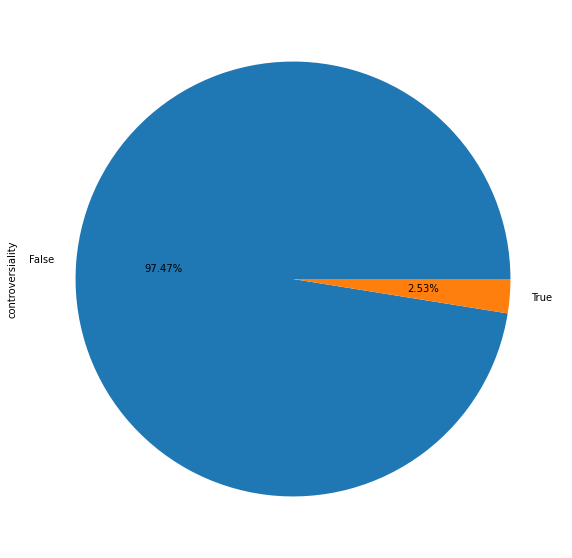

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [16]:
df['stickied'] = df['stickied'].replace(0,False)
df['stickied'] = df['stickied'].replace(1,True)

False    474001
True          2
Name: stickied, dtype: int64


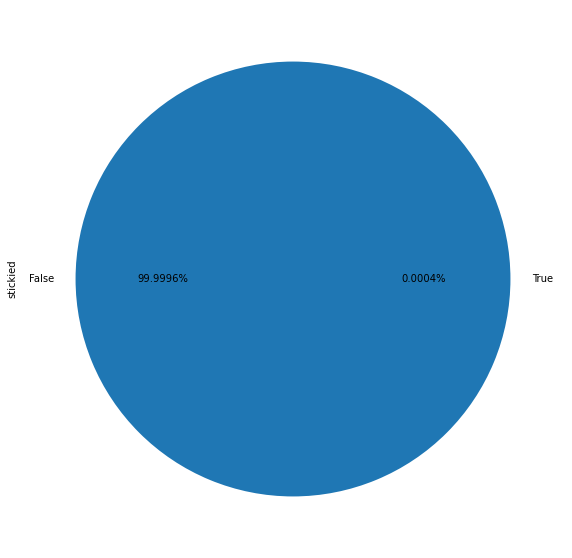

In [18]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.4f%%')
print(df["stickied"].value_counts())

# Link_id

t3_k0f4qy    1091
t3_jmpuc6     991
t3_k2y6wy     870
t3_k01ns4     843
t3_k0u71g     816
             ... 
t3_jomv7u       1
t3_jomsi2       1
t3_jomk9b       1
t3_jzvb95       1
t3_k48orx       1
Name: link_id, Length: 38580, dtype: int64


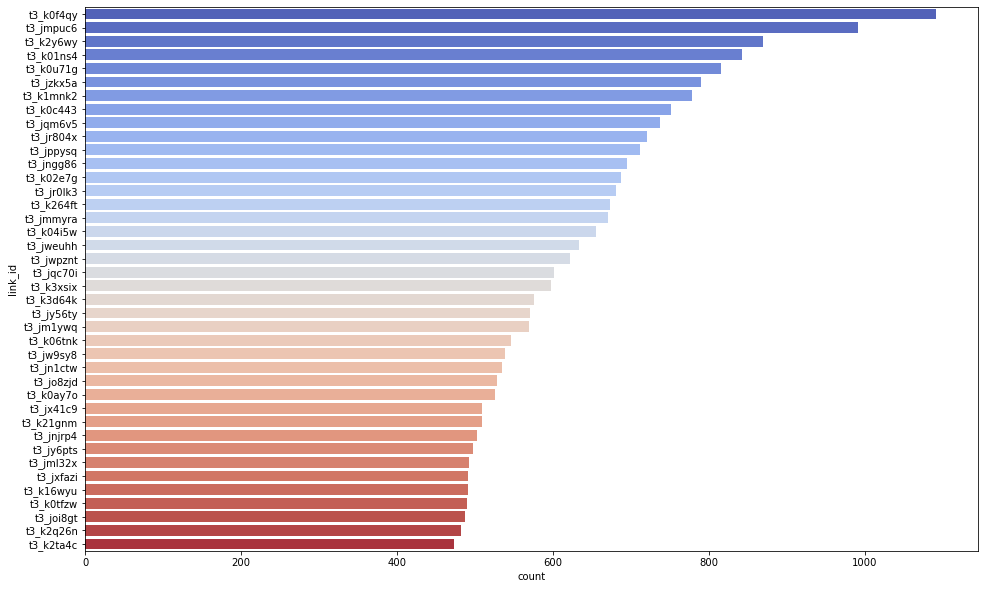

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [20]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 38580


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

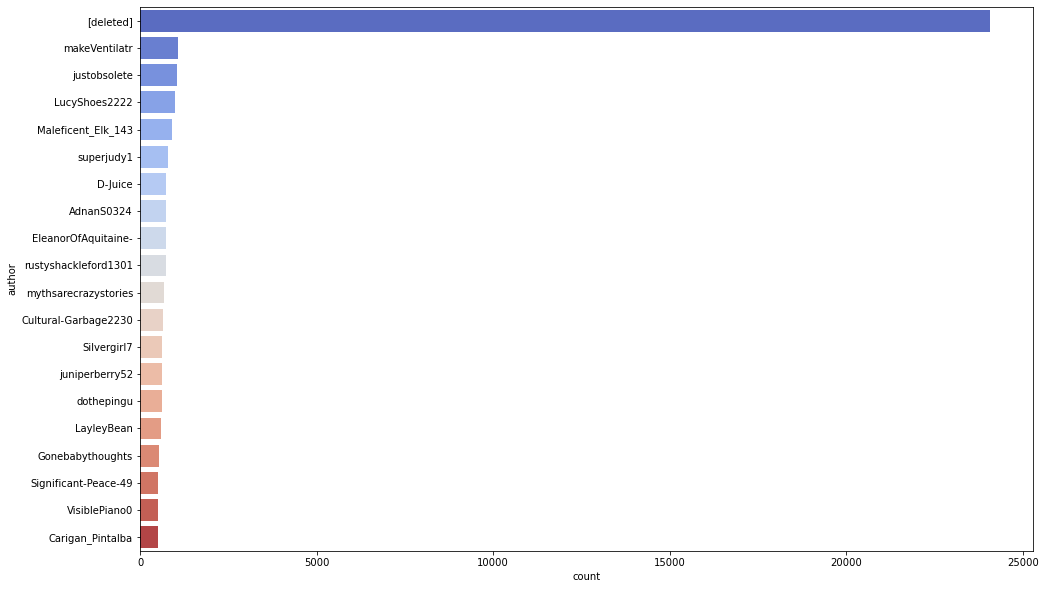

In [21]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

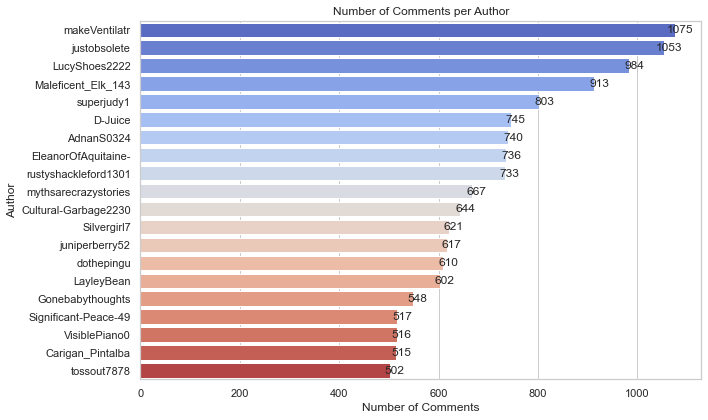

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [23]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 86570


In [24]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 12.29


In [25]:
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.48


# Hours

([<matplotlib.axis.XTick at 0x7fbb6bc837f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

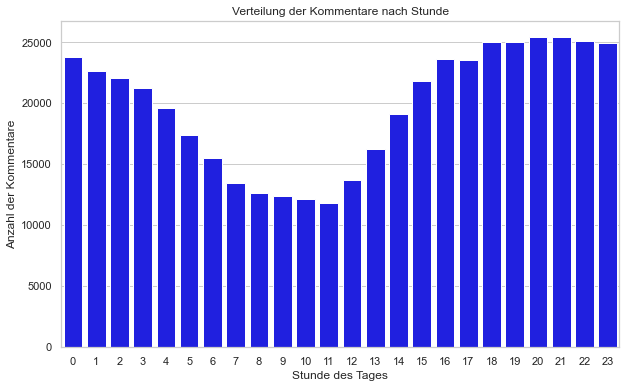

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

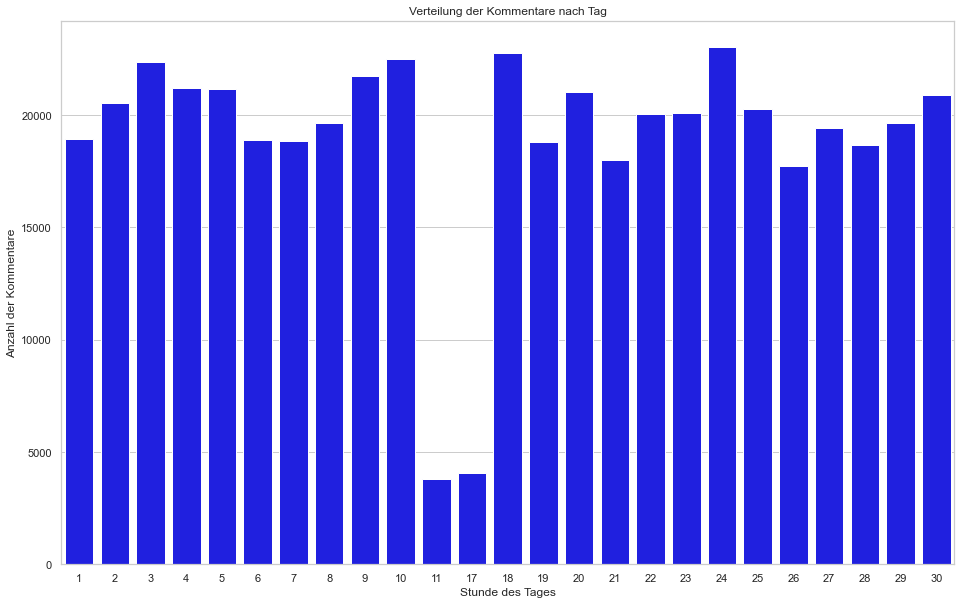

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    473874
1       119
2         9
3         1
Name: gilded, dtype: int64


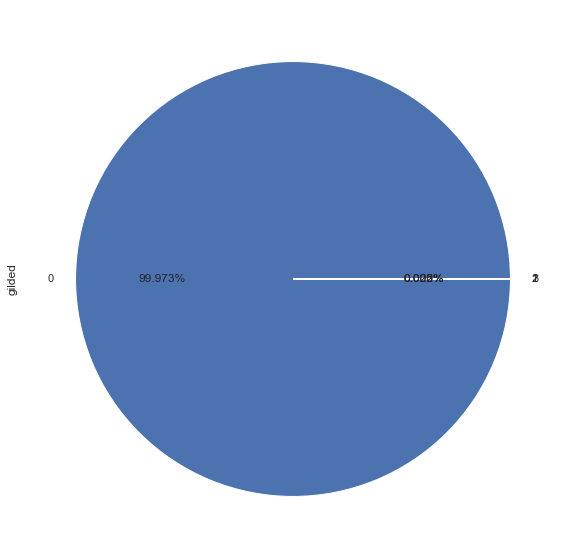

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguished

In [29]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        474000
moderator         3
Name: distinguished, dtype: int64


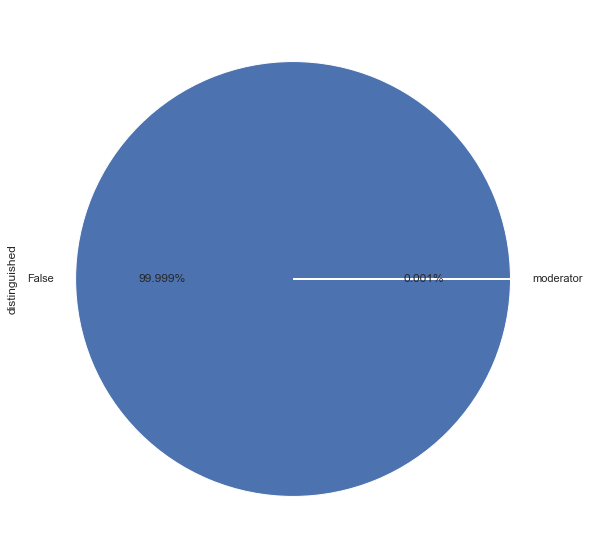

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [31]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    463095
True      10908
Name: edited, dtype: int64


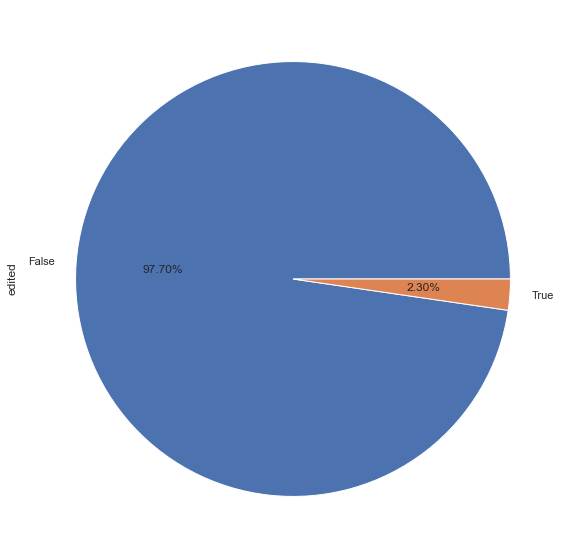

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [33]:
df["score"].mean()

10.74873998687772

In [34]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
41281,Tank261528,0,My money is on Sugar Tits,False,2020-11-03 01:49:55,False,False,0,gaym8m2,t3_jn1ctw,t3_jn1ctw,6790,False,1,3,2020,My money is on Sugar Tits,6
346556,AdnanS0324,0,Dude. Get out of this relationship. Wtf.,False,2020-11-24 15:17:40,False,False,1,gdg76l9,t3_k06tnk,t3_k06tnk,6030,False,15,24,2020,Dude . Get out of this relationship . Wtf .,10
328892,3Magic_Beans,0,Sleep expert here. Before jumping on the menta...,False,2020-11-23 18:44:20,False,True,0,gdctw6a,t3_jzkx5a,t3_jzkx5a,5804,False,18,23,2020,Sleep expert here . Before jumping on the ment...,91
163079,ThrillaDaGuerilla,0,This is what happens when you don't deal with ...,False,2020-11-09 01:25:00,False,False,0,gbob6os,t3_jqm6v5,t3_jqm6v5,5743,False,1,9,2020,This is what happens when you don t deal with ...,117
84112,YarraYarra,0,So the trophy wife acts like a trophy wife and...,False,2020-11-05 01:22:21,False,True,0,gb6iktf,t3_jo8zjd,t3_jo8zjd,5433,False,1,5,2020,So the trophy wife acts like a trophy wife and...,57
345203,jaime0007,0,"Damn, that delete Reddit button looking fine t...",False,2020-11-24 13:18:04,False,False,0,gdfsyp2,t3_k04i5w,t3_k04i5w,5394,False,13,24,2020,Damn that delete Reddit button looking fine to...,9
234808,teenwitchsbrother,0,From gf's perspective to be fair to her she p...,False,2020-11-18 22:33:35,False,False,1,gcrmsw9,t3_jwpznt,t3_jwpznt,5289,False,22,18,2020,From gf s perspective to be fair to her she pr...,76
134129,NiteGrimwood,0,He is 100% using you,False,2020-11-07 15:08:56,False,False,1,gbgi67h,t3_jps926,t3_jps926,5162,False,15,7,2020,He is using you,4
393821,Competitive_Cuddling,0,"Next time you're on your period, mark his fore...",False,2020-11-26 21:21:07,False,False,1,gdpcyad,t3_k1mq17,t3_k1mq17,5118,False,21,26,2020,Next time you re on your period mark his foreh...,21
92939,immediatethor,0,"Hey man, I’m a transgender male so thought I’d...",False,2020-11-05 14:09:19,False,True,1,gb88jo5,t3_joi8gt,t3_joi8gt,4893,False,14,5,2020,Hey man I m a transgender male so thought I d ...,202


In [35]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
181896,ThrowRAawfulhusband,0,I didn't think it was that bad in the moment,False,2020-11-09 22:34:41,False,True,0,gbrl2tu,t3_jr804x,t1_gbrkstq,-969,False,22,9,2020,I didn t think it was that bad in the moment,11
292906,Meegod,0,Age gap only important when is the man. If its...,False,2020-11-21 22:20:14,False,False,0,gd4bc9u,t3_jyjcw7,t1_gd4am7s,-793,False,22,21,2020,Age gap only important when is the man . If it...,19
48654,dilath,0,Don’t listen to this dude. Just do what your m...,False,2020-11-03 11:26:36,False,False,0,gaztvnc,t3_jn54rl,t1_gazaz89,-752,False,11,3,2020,Don t listen to this dude . Just do what your ...,21
156878,time_to_make-you-mad,0,He was drunk and in no position to drive what ...,False,2020-11-08 19:22:41,False,False,0,gbn4mqe,t3_jqg3gv,t1_gbn2e94,-627,False,19,8,2020,He was drunk and in no position to drive what ...,16
9325,[deleted],0,Have you ever sat your gf down and asked HER a...,False,2020-11-01 13:46:07,False,False,0,gasik9x,t3_jm298v,t1_gasi40k,-535,False,13,1,2020,Have you ever sat your gf down and asked HER a...,133
216980,Mundanebar8,0,Are you sure it’s abuse? He has not hit me. I ...,False,2020-11-18 03:04:14,False,False,0,gcokbx7,t3_jw7r00,t1_gcojwec,-513,False,3,18,2020,Are you sure it s abuse He has not hit me . I ...,35
470614,trumpshouldvewon,0,yeah she's so brave! This definitely happened ...,False,2020-11-30 20:29:59,False,False,0,ge6n0yh,t3_k42wdc,t1_ge6f5wz,-509,False,20,30,2020,yeah she s so brave This definitely happened a...,13
304638,[deleted],0,I mean she told me she would never cheat on me...,False,2020-11-22 13:51:41,False,False,0,gd7tl90,t3_jyu27c,t1_gd7gutf,-504,False,13,22,2020,I mean she told me she would never cheat on me...,32
459338,Jeremy_Anderson_69,0,I've gotten rejected so many times I can't eve...,False,2020-11-30 05:33:42,False,False,0,ge4f8ol,t3_k3o9yk,t1_ge488qt,-503,False,5,30,2020,I ve gotten rejected so many times I can t eve...,43
293402,Meegod,0,I’ve seen so many posts where the lady is olde...,False,2020-11-21 22:48:30,False,False,0,gd4fzzr,t3_jyjcw7,t1_gd4fh10,-468,False,22,21,2020,I ve seen so many posts where the lady is olde...,25


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

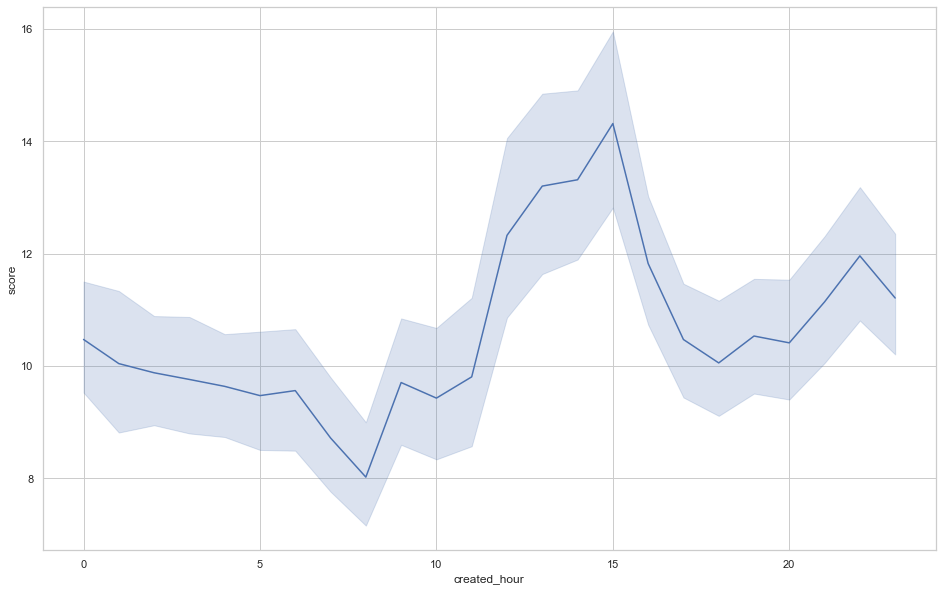

In [36]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs Score on comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

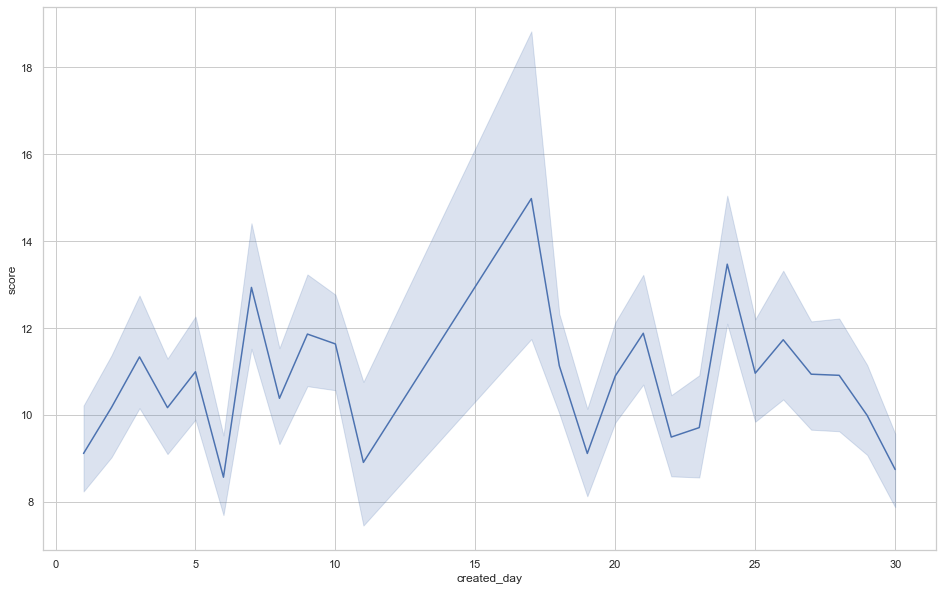

In [37]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

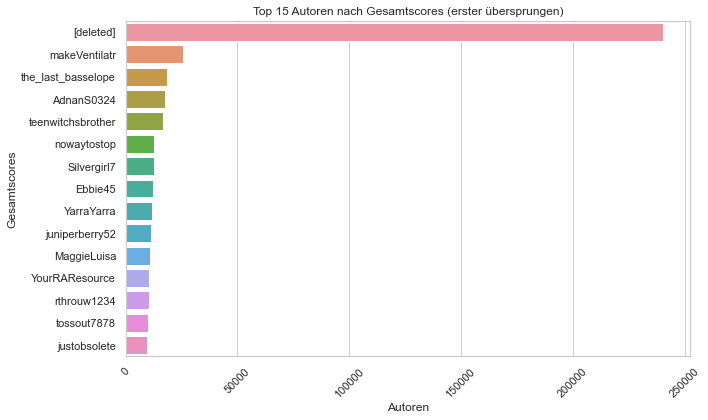

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

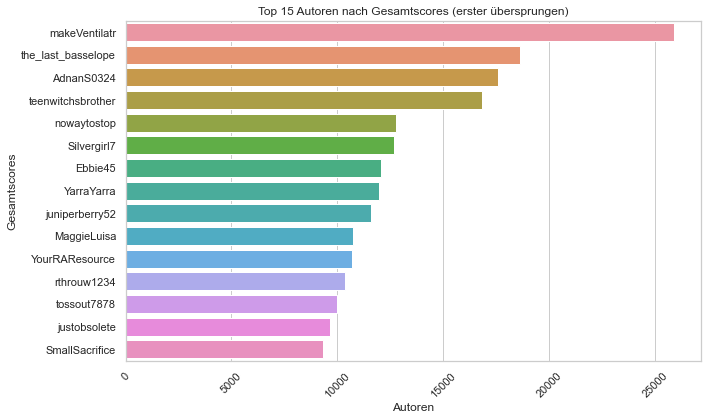

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den Autor "[deleted]" aus der sortierten Liste entfernen
sorted_authors = sorted_authors[sorted_authors.index != "[deleted]"]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,474003.000000,474003.000000,474003.000000,474003.000000,474003.0,474003.000000
mean,0.000295,10.748740,12.224277,15.783811,2020.0,59.680198
std,0.018598,86.103295,7.415400,9.678400,0.0,71.614876
min,0.000000,-969.000000,0.000000,1.000000,2020.0,1.000000
25%,0.000000,1.000000,5.000000,6.000000,2020.0,17.000000
50%,0.000000,2.000000,14.000000,19.000000,2020.0,38.000000
75%,0.000000,3.000000,19.000000,24.000000,2020.0,76.000000
max,3.000000,6790.000000,23.000000,30.000000,2020.0,1986.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474003 entries, 0 to 474454
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             474003 non-null  object
 1   author_flair_text  474003 non-null  object
 2   body               474003 non-null  object
 3   controversiality   474003 non-null  bool  
 4   created_utc        474003 non-null  object
 5   distinguished      474003 non-null  object
 6   edited             474003 non-null  bool  
 7   gilded             474003 non-null  int64 
 8   id                 474003 non-null  object
 9   link_id            474003 non-null  object
 10  parent_id          474003 non-null  object
 11  score              474003 non-null  int64 
 12  stickied           474003 non-null  bool  
 13  created_hour       474003 non-null  int64 
 14  created_day        474003 non-null  int64 
 15  created_year       474003 non-null  int64 
 16  clean_text         4

# Save cleaned general data

In [42]:
df.to_csv("relationship_advise_20_comments_EDA_clean.csv",index=False,sep=",")

In [43]:
import pandas as pd
df_new=pd.read_csv("relationship_advise_20_comments_EDA_clean.csv",sep=",")
df_new.info()

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474003 entries, 0 to 474002
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             474003 non-null  object
 1   author_flair_text  474003 non-null  object
 2   body               474003 non-null  object
 3   controversiality   474003 non-null  bool  
 4   created_utc        474003 non-null  object
 5   distinguished      474003 non-null  object
 6   edited             474003 non-null  bool  
 7   gilded             474003 non-null  int64 
 8   id                 474003 non-null  object
 9   link_id            474003 non-null  object
 10  parent_id          474003 non-null  object
 11  score              474003 non-null  int64 
 12  stickied           474003 non-null  bool  
 13  created_hour       474003 non-null  int64 
 14  created_day        474003 non-null  int64 
 15  created_year       474003 non-null  int64 
 16  clean_text         4

False    474001
True          2
Name: stickied, dtype: int64


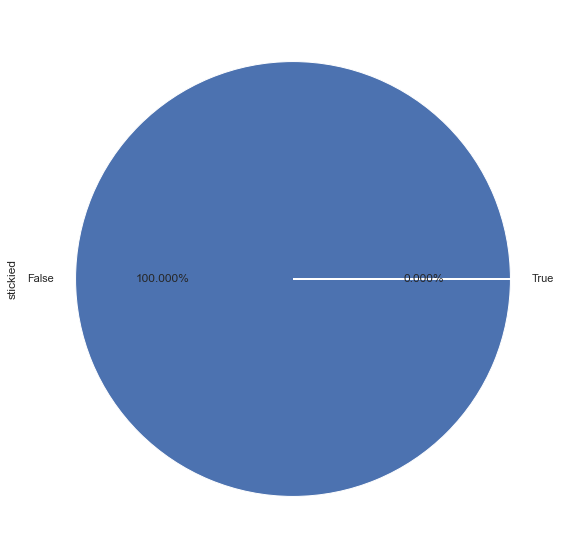

In [44]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df_new["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df_new["stickied"].value_counts())

In [45]:
df_new

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,boop_the_snoot30167,0,I broke up with a boyfriend of two years at ar...,False,2020-11-01 00:00:01,False,False,0,gaqv3qw,t3_jldu1m,t3_jldu1m,2,False,0,1,2020,I broke up with a boyfriend of two years at ar...,126
1,GunsmokeG,0,"Sounds like your dad is not perfect, but he su...",False,2020-11-01 00:00:03,False,False,0,gaqv3uo,t3_jlsmda,t3_jlsmda,-1,False,0,1,2020,Sounds like your dad is not perfect but he sur...,52
2,[deleted],0,keep fantasising about how women should act fr...,False,2020-11-01 00:00:05,False,False,0,gaqv3ze,t3_jleks8,t1_gaqtke2,0,False,0,1,2020,keep fantasising about how women should act fr...,12
3,mwayneb,0,Dump his ass. Find someone who is crazy about ...,True,2020-11-01 00:00:06,False,False,0,gaqv40a,t3_jlnc6o,t3_jlnc6o,-2,False,0,1,2020,Dump his ass . Find someone who is crazy about...,35
4,MarBremus,0,I know just the person. She's a good friend an...,False,2020-11-01 00:00:07,False,False,0,gaqv41r,t3_jlrg95,t1_gaqnj2q,109,False,0,1,2020,I know just the person . She s a good friend a...,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473998,zoeyykush,0,Again I’m not talking about what happened toda...,False,2020-11-30 23:59:16,False,False,0,ge7epub,t3_k3t8nt,t1_ge78jm8,1,False,23,30,2020,Again I m not talking about what happened toda...,55
473999,kevin_r13,0,so even after drinking a lot of alcohol with h...,False,2020-11-30 23:59:19,False,False,0,ge7eq1v,t3_k3wjij,t3_k3wjij,2,False,23,30,2020,so even after drinking a lot of alcohol with h...,57
474000,combatativemonkey,0,I’m sorry for your loss 😢,False,2020-11-30 23:59:26,False,False,0,ge7eqop,t3_k446eh,t3_k446eh,1,False,23,30,2020,I m sorry for your loss crying face,8
474001,Cuddlyflower,Teens Female,That’s fair. I’m just a super guilty person so...,False,2020-11-30 23:59:37,False,False,0,ge7erlc,t3_k48ays,t1_ge7cdlo,1,False,23,30,2020,That s fair . I m just a super guilty person s...,20


In [312]:
df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
0,boop_the_snoot30167,0,I broke up with a boyfriend of two years at ar...,0,2020-11-01 00:00:01,0,0,0,gaqv3qw,t3_jldu1m,t3_jldu1m,2,0,0,1,2020
1,GunsmokeG,0,"Sounds like your dad is not perfect, but he su...",0,2020-11-01 00:00:03,0,0,0,gaqv3uo,t3_jlsmda,t3_jlsmda,-1,0,0,1,2020
2,[deleted],0,keep fantasising about how women should act fr...,0,2020-11-01 00:00:05,0,0,0,gaqv3ze,t3_jleks8,t1_gaqtke2,0,0,0,1,2020
3,mwayneb,0,Dump his ass. Find someone who is crazy about ...,1,2020-11-01 00:00:06,0,0,0,gaqv40a,t3_jlnc6o,t3_jlnc6o,-2,0,0,1,2020
4,MarBremus,0,I know just the person. She's a good friend an...,0,2020-11-01 00:00:07,0,0,0,gaqv41r,t3_jlrg95,t1_gaqnj2q,109,0,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522859,zoeyykush,0,Again I’m not talking about what happened toda...,0,2020-11-30 23:59:16,0,0,0,ge7epub,t3_k3t8nt,t1_ge78jm8,1,0,23,30,2020
522860,kevin_r13,0,\nso even after drinking a lot of alcohol with...,0,2020-11-30 23:59:19,0,0,0,ge7eq1v,t3_k3wjij,t3_k3wjij,2,0,23,30,2020
522862,combatativemonkey,0,I’m sorry for your loss 😢,0,2020-11-30 23:59:26,0,0,0,ge7eqop,t3_k446eh,t3_k446eh,1,0,23,30,2020
522863,Cuddlyflower,Teens Female,That’s fair. I’m just a super guilty person so...,0,2020-11-30 23:59:37,0,0,0,ge7erlc,t3_k48ays,t1_ge7cdlo,1,0,23,30,2020
